In [123]:
import warnings
warnings.filterwarnings("ignore")

## Loading
Piriya, Lucas, and Pablo Laso

In [109]:
#Packages

import numpy as np
import pandas as pd
import time
import seaborn as sns
sns.set_theme()
# from sklearn.tree import DecisionTreeClassifier

In [122]:
df = pd.read_csv('data_features_all.csv',index_col=0)
df.head(3)

,SMILES,ACTIVE,mol,fragm_fr_Al_COO,fragm_fr_Al_OH,fragm_fr_Al_OH_noTert,fragm_fr_ArN,fragm_fr_Ar_COO,fragm_fr_Ar_N,fragm_fr_Ar_NH,...,rdMol_GetMACCSKeysFingerprint,rdMol_GetTopologicalTorsionFingerprint,rdMol_MQNs_,rdMol_PEOE_VSA_,rdMol_SMR_VSA_,rdMol_SlogP_VSA_,rdMol__CalcCrippenContribs,rdMol__CalcLabuteASAContribs,rdMol__CalcMolWt,rdMol__CalcTPSAContribs
INDEX,,,,,,,,,,,,,,,,,,,,,
1,C=C(C)c1cccc(C(C)(C)NC(=O)Nc2cc(C)ccc2OC)c1,0.0,<rdkit.Chem.rdchem.Mol object at 0x0000020A003...,0,0,0,0,0,0,0,...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.LongSparseIntV...,"[21, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 25, 12, 2, ...","[15.370440161812711, 0.0, 4.794537184071822, 0...","[9.53140013787187, 0.0, 5.316788604006331, 0.0...","[15.370440161812711, 13.140912053615605, 5.538...","[(0.1551, 3.513), (0.264, 4.305), (0.1441, 2.5...",(<rdkit.rdBase._vectdouble object at 0x0000020...,338.451,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,CCCN(CCC)C(=O)CC(c1ccccc1)c1ccc(C)cc1O,0.0,<rdkit.Chem.rdchem.Mol object at 0x0000020A003...,0,0,0,0,0,0,0,...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.LongSparseIntV...,"[22, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 25, 13, 1, ...","[10.006437125691184, 4.794537184071822, 0.0, 0...","[9.901064578912528, 0.0, 4.899909730850478, 0....","[0.0, 29.003129666867842, 4.794537184071822, 6...","[(0.1441, 2.503), (0.1441, 2.503), (-0.2035, 2...",(<rdkit.rdBase._vectdouble object at 0x0000020...,339.479,"(0.0, 0.0, 0.0, 3.24, 0.0, 0.0, 0.0, 0.0, 17.0..."
3,O=C(CC1NCCNC1=O)Nc1ccccc1,0.0,<rdkit.Chem.rdchem.Mol object at 0x0000020A003...,0,0,0,0,0,0,0,...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.LongSparseIntV...,"[12, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 17, 4, 2, 0...","[15.950365812018994, 9.589074368143644, 0.0, 0...","[9.589074368143644, 0.0, 10.633577208012662, 0...","[15.950365812018994, 30.945713099676123, 9.589...","[(-0.1526, 0.0), (-0.2783, 5.007), (0.1441, 2....",(<rdkit.rdBase._vectdouble object at 0x0000020...,233.271,"(17.07, 0.0, 0.0, 0.0, 12.03, 0.0, 0.0, 12.03,..."


In [124]:
df = df.select_dtypes(include=np.number)
X = df.drop('ACTIVE',axis=1)
y = df['ACTIVE']

## Feature selection

In [116]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

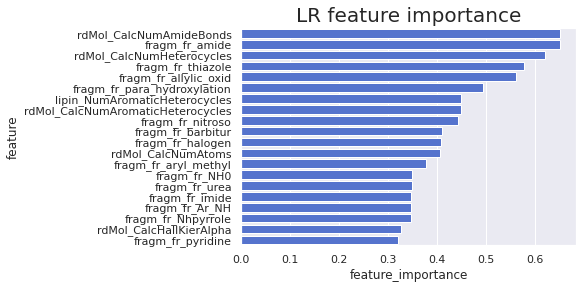

In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
feature_importances_= np.abs(lr.coef_)[0]
base_imp = imp_df(X_train.columns,feature_importances_)
var_imp_plot(base_imp[:20], 'LR feature importance')
lr_features=base_imp[:50]['feature']

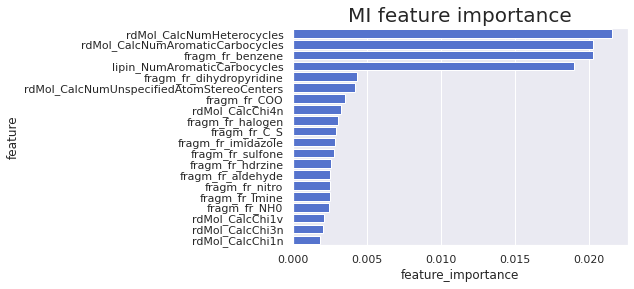

In [118]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X_mi = SelectKBest(mutual_info_classif, k=50).fit(X_train, y_train)

feature_data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnoAAAEhCAYAAADoCw2lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsTAAALEwEAmpwYAAB7aklEQVR4nO3de1zP9///8VsHhRIJzRzGbGUOkUM557jlkA7O5jTDzGm0JnIYLTmFkVlzttEcKp2wAxb2QQ4zsTkNkVPJsYPO798f/Xp9e+v0jlLyuF4uLh+9js/X8/3+2KPn6/V63rVUKpUKIYQQQghR5miXdAOEEEIIIUTxkEJPCCGEEKKMkkJPCCGEEKKMkkJPCCGEEKKMkkJPCCGEEKKMkkJPCCGEEKKMkkJPCCHeEPHx8Xh4eNC1a1caNWqEubk5Fy5cKOlmlXrh4eGYm5vj7e1d0k0RotCk0BNCiFfM3Nwcc3NzGjZsyM2bN/Pcbvjw4cq2AQEBautmzJiR6/L8LFmyhJ9++gkzMzPGjRvHpEmTqFat2gtfR2F4e3tjbm5OeHj4KzmfeDFZ3zlRduiWdAOEEOJNpKurS1paGn5+fjg7O+dYHxkZyYkTJ5TtikJYWBj16tXDx8enSI73prCwsGDv3r0YGxuXdFOEKDQZ0RNCiBJgYmJCkyZNCAgIyLWQ27VrFwBdunQpsnPGxMRQo0aNIjvem6JChQo0aNCAqlWrlnRThCg0KfSEEKKEDBw4kPv37xMWFqa2PDU1ld27d2NpaUmDBg1e+jxZt+NUKhUnTpxQbgcPHz5cbbsjR44wduxYrK2tadKkCd27d2fx4sU8ffo0xzGPHz/OnDlz6NWrFy1atMDCwoI+ffqwevVqkpOT1bbt2rUrq1evBmDEiBHK+bPfIszvlmFAQECut6m7du1K165diY+PZ+HChXTt2pXGjRurPUt39epVZsyYgY2NDU2aNKFdu3Z8+eWXXLt2TeP+y+sZvaw2p6amsnr1arp3707Tpk356KOP2Llzp7Ldzz//jJ2dHRYWFnTq1IlVq1aRkZGhdqxbt25hbm7OjBkzuHr1KhMmTMDKyormzZszZMgQ/vzzz1zblpKSwtq1a7Gzs6NZs2a0aNGCoUOHsnfv3hzbZj/H9evXmTp1Km3btqVhw4ZKH584cQJA7TPK/j0pzOcO6rfsf/nlF/r370+zZs2wsrJi2rRpREdH53pdjx8/ZsWKFfTp04dmzZrRsmVL+vbti5eXF4mJiTm2XbZsGT179sTCwoKWLVsycuTIPPvsTSO3boUQooT07t2bRYsWsWvXLrp3764sP3jwIA8ePMDFxYUbN2689HkcHR2xsrJi9erV1KpVC0dHRwBq1aqlbLN69Wq8vb2pUqUKnTt3pmrVqly+fJmNGzdy+PBhduzYgaGhobL9unXruH79OpaWltjY2JCSksJff/2Ft7c34eHhbN68GR0dHSCzuDtw4AAnTpzA0dFR7bwvKyUlhREjRvDkyRPat2+PoaEhtWvXBuDw4cNMnjyZtLQ0unTpQt26dYmOjua3334jLCyMH3/8kcaNG790G5ydnTl79iw2Njbo6ury66+/MmfOHHR1dbl06RKBgYF07tyZNm3acPDgQb777jvKly/PuHHjchzr1q1bDB48GDMzMwYNGsT9+/fZu3cvY8eOZdmyZfTq1Uvt2j/99FNOnDjBu+++y9ChQ0lKSuLXX39l2rRpXLx4MdfHAm7evMnAgQOpV68ednZ2JCUlYW5uzqRJk9i9eze3b99m0qRJyvbZP6/CfO7Z+fr6cvDgQbp27Urr1q2JiIhg7969XLx4kaCgIPT09JRto6KiGDlyJLdv36Zx48YMGTKEjIwMIiMj2bx5M4MHD6ZixYoA3L59m+HDh3P79m1atWpFx44defbsGX/88QdjxozB3d2dgQMHvtgHW1aohBBCvFJmZmaqjh07qlQqlcrNzU31wQcfqO7evausHz16tKpFixaqxMRE1fLly1VmZmYqf39/tWO4urrmuryg8w4bNizH8mPHjqnMzMxUgwYNUj158kRtnb+/v8rMzEy1YMECteU3b95UZWRk5DjWihUrVGZmZqo9e/aoLV+1apXKzMxMdfz48VzbNmzYMJWZmVmu67La8Py1dunSRWVmZqYaOXKkKiEhQW3d48ePVa1atVJZWVmprly5orbu0qVLqubNm6scHBxyPd/zjh8/rjIzM1OtWrUq1zY7OTmp9dvNmzdVjRs3VrVq1UrVpUsX1b1795R1T548UVlZWamsra1VqampyvKoqCiVmZmZyszMTLVo0SK180RERKgaNWqkatWqlSouLk5Z7uPjozIzM1ONGTNG7VixsbFK35w+fTrXcyxbtizXa83vc8i6thf53C0tLVUXL15UW+fs7JzrPoMGDVKZmZmpfHx8cpznwYMHqqSkJLX2mpubq0JDQ9W2e/Lkiapv376qpk2bqu7fv5/n9bwJ5NatEEKUoIEDB5Keno6fnx+QOUJx9OhR7OzsqFChwitpw08//QTAN998g5GRkdo6JycnPvjgA0JCQtSW16lTBy0trRzHGjVqFJB5G/hVmTFjhjLCkyUwMJCnT58yZcoU3nvvPbV1ZmZmDBgwgH///Zf//vvvpc/v4uKi1m916tShRYsWPH36lAkTJmBqaqqsMzIyomvXrjx69CjX25aVKlVi4sSJasuaNm2KnZ0dT58+5ffff1eW+/v7o6WlxYwZM9DV/b8bdCYmJnz++efA/z3rmV21atXURuwK40U/99xuzQ8YMACAc+fOKcvOnz/PmTNn+OCDDxg7dmyO41StWhV9fX0ALl68yIkTJ/jwww/p3bu32nZGRkZMnjyZ5ORkfv31V80vsAySW7dCCFGCmjVrhpmZGQEBAUyYMIFdu3aRkZHxSm83/f3335QrV45ffvmFX375Jcf61NRUHj58yKNHj5Q3TxMTE/nxxx/5/fffiYyMJCEhAZVKpewTExPzStqur6+f67N9f//9N5BZDOQ2/11kZCSQ+Qzf84VgYTVp0iTHsqyXXvJbd+/evRy3sRs1aqR2izyLlZUVu3fv5t9//8XR0ZH4+Hhu3LiBqalprs9xtmnTBiDXeRIbNmyodqu0MF70c2/atGmOZTVr1gTgyZMnyrKzZ88C0KFDB7S18x+LOnPmDJA5P2Run/HDhw8BCvU8ZlkkhZ4QQpSwgQMH4uHhweHDhwkICKBx48Y0atTolZ3/8ePHpKWlKS9M5CUxMRFjY2NSU1MZOXIkERERmJmZ0atXL6pWraqMKq1evZqUlJRX0XRMTExyHWF6/PgxgNpLEbl5/sH+F1GpUqUcy7L6IreiLWtdbm9b5zWvYdby+Ph4tf+tXr16rttnFZO5vUjzonMnvsznnlsfZT3Ll/3FlKz2Zh8FzUvWZ/y///2P//3vf3luVxSf8etMCj0hhChh9vb2eHl58fXXXxMdHZ3j1l1xMzQ0VN7I1cSBAweIiIjAycmJhQsXqq2LiYkpsGDMTVaxlpaWpnYbEnIvVp7f73lZhUVQUBANGzYsdHtKSmxsbL7LswrHrP/Na/uskbXcCqy8+qwgxfG5Py/rFnheb+Nml3Vts2bNYsSIES997rJKntETQogSZmRkxEcffcS9e/eoWLFijueNilvz5s158uQJV65c0Wj7rDSPHj165Fh38uTJXPfJug33/LQiWSpXrgzA3bt3c6w7f/68Ru3KrlmzZgCcPn260PuWpH///VcZrcsuqwjPGuk1NDRU3iLOug2dXVYCSWFHhrM+p/T09BzrXuRzL6ysz+3PP//M87vy/LanTp0qknOXVVLoCSFEKTB16lS+++471q9fn+vtvuKU9SD9nDlzch1JSUxMVJ55g/+bbuP5EcCoqCi8vLxyPUeVKlUAuHPnTq7rs57hev7lgWPHjrFnz54Cr+F5Tk5OGBkZsXr1aiIiInKsz8jIKJVxbHFxcXz33Xdqy86dO0dISAiVKlVSK7L69euHSqViyZIlaoXZw4cPWbNmjbJNYeT3Ob3I515YTZo0wdLSkgsXLrBu3boc6x89eqTM19e0aVNatWrF77//rrzM9LxLly7x4MGDImnb60pu3QohRCnw9ttv8/bbb5fIudu2bcuXX37J8uXL+eijj+jUqRO1a9cmMTGRO3fucPLkSVq0aMGGDRuAzLSOd955h02bNnH58mU++OAD7t69yx9//EHnzp1zLRLatGmDtrY2y5cv58qVK8otugkTJgCZBcmGDRv44YcfuHjxIg0aNCAyMpIjR47Qo0ePQr85aWxszKpVq5g4cSIDBw6kbdu2vPfee2hpaXHv3j3OnDnD48eP1d74LA1at26Nn58fERERtGjRQplHLyMjA3d3d7VfAkaPHs3hw4c5cOAA9vb2dOrUiaSkJH755RcePHjAmDFjaNWqVaHO37ZtW3755RcmT56MjY0N+vr6vP322zg4OLzQ5/4ili5dyogRI1i+fDm//vor1tbWqFQqIiMj+d///se+ffuUuRKXLVvGyJEjmTVrFj/99BPNmjWjUqVK3Lt3j8uXL3P58mV27NiBiYlJkbTtdSSFnhBCCMaNG0eLFi346aefOH36NAcPHsTQ0BBTU1MGDhxInz59lG0rVqzIli1b8PLy4sSJE5w6dYo6deowYcIEPvnkk1xTGRo0aMCiRYvYuHEjvr6+yqhMVqFnYmLC1q1bWbJkCSdPnuTkyZM0adKEjRs3cuvWrReaIqNt27YEBwezceNG/vzzT06dOkW5cuWoUaMGbdq04aOPPnrB3io+tWvXZv78+Xh5ebF9+3ZSUlJo1KgREydOpGPHjmrb6unpsWnTJjZt2kRoaChbt25FR0eHhg0b4ubmpvaZaWrAgAHcuXOHPXv2sH79etLS0rCyssLBweGFPvcXUadOHQICAli/fj379+9n69at6OvrU6tWLUaPHq1WtL311lv4+/uzdetWfvvtN0JCQkhPT6datWq89957DBs2DDMzsyJp1+tKS5X9vWghhBBCvHK3bt2iW7duODo6smjRopJujihD5Bk9IYQQQogySgo9IYQQQogySgo9IYQQQogySp7RE0IIIYQoo2RETwghhBCijJJCTwghhBCijJJ59IQQQgghSlhycjrx8c9eaF9tbS2MjQ1yXSeFnhCi1Jm44Dz3H6WUdDOEEOKV2enVgqdPi/61Cbl1K/I0Y8YMtm7dCoC3tzfm5uaEhYUp6xMSErC0tMTJyanAYwUEBDBlypQCtwsODsbBwQFbW1ucnJyYNm1agbE6mh7b3NycMWPG5FiWkJBQ4L6aunXrFtbW1mrLEhISMDc312h/b29vUlJKd4HTtWtXLl++XNLNEEIIoQEp9AQAaWlpBW7TuHFjdu/erfz8yy+/UL9+/SJrw65du/Dx8eHbb7/ll19+ISAggMGDBxMbG1tk57h27RonT54ssuMVtdWrV5Oamlro/TT5/IQQQrx55NbtG8zc3JxJkyYRFhZGx44dGTJkCNOnT+f+/fvUqlULbW313wOsrKwICwvjyZMnVK5cmcDAQBwdHdWKv8DAQCX4vG7duri7u2scJr169Wo8PDyoV6+esixrdCwtLY3PPvuMR48ekZycjIWFBfPnz0dPTy/Hcfz8/Pjxxx8BKFeuHD/88APVqlUDYPLkySxbtozt27fn2h9//fUXBgYGOX42Nzdn6tSp7N+/n8ePH+Ph4cHRo0c5cuQIaWlprFy5kgYNGmh0ndeuXcPT05NHjx6RmprKyJEj6devH/Pnzwdg8ODBaGtr89NPP6Gtrc3ChQu5dOkSycnJWFtbM3PmTHR0dBg+fDgNGzbk7NmzVK5cGR8fH7y8vDhy5AgAHTt2xMXFBR0dHeLi4vD09OT8+fNoaWnRqlUrXF1d6datGwEBAdSoUQMADw8PqlWrxvjx4zlz5gxLlixRRjynT59Ohw4d1K4lJiYGDw8P7ty5Q3JyMr1792b8+PFKAPvx48fR09OjYsWKufa5EEKI4iWF3htOX18ff39/ILMIat26NZMmTSIqKoq+ffuqhWhraWnRq1cv9uzZQ8eOHUlMTFQLi758+TJeXl5K4fDtt9/yzTff8O233xbYjgcPHnDv3j2aNWuW63odHR28vLwwNjZGpVLh6uqKv78/Q4YMUdsuPDycH374AV9fX6pXr05CQgK6uv/3Nf/www/Ztm0b+/fvp3v37oXpKoyMjPD392ffvn1MmDCB5cuX8+WXX7Ju3Tq+//57vLy8AIiLi8Pe3l7ZLyMjQ/l7WloaLi4uLF26lAYNGhAfH0+/fv1o3rw5X3/9Nb6+vmzfvl0pNmfNmkXr1q1ZsGABGRkZuLi44O/vz8CBAwGIiorC19cXXV1dfH19uXDhAgEBAQCMHTuWHTt2MHToUDw9PalYsSJBQUFoa2vz8OFD9PX1cXBwYOfOnUyaNImEhAT27NlDaGgojx8/ZtKkSXh7e9OiRQvS09OJj4/P0Seurq5MmDCB1q1bk5KSwqhRo2jatCnGxsaEh4ezd+9etLW1efLkSaH6WgghRNGQQu8N5+joqPw9PDyc2bNnA1CnTh3atm2b6/YuLi7Exsbi4OCgti48PBwbGxtldGjw4MFqBc/LyMjIYOPGjRw+fJiMjAyePHlC+fLlc2wXFhaGvb091atXB1AKpuycnZ1ZuHAhXbt2LVQbevbsCWTewgbo0qULAE2aNOH3339XtqtUqRJBQUHKzwkJCbRo0QKAyMhIrl69irOzs7I+NTWVa9eu5ToiePDgQSIiIti0aRMASUlJmJqaKuvt7OyUQvbYsWM4Ojoqo5xOTk7s37+foUOH8scffxAQEKCM0latWhWAjz/+mI8//pjx48cTHBxM+/btMTExISwsjAYNGijt1tHRoXLlymptS0xM5MSJEzx8+FDtWq9evYqjoyNpaWnMmjULa2trpa+EEEK8WlLoveEqVqxYqO3r1KmDnp4eO3fuJCQkpMgeyjcxMcHU1JSIiIgctwcBQkJCOH36NNu2bcPQ0BAfHx8iIyNf6Fzt2rXDxMSE4OBgteU6OjpkBcUkJyfn2E9fXx8AbW1ttVvG2traGj8jp1KpMDY2VisEC9p+zZo11KlTJ9f1hf38nlezZk2aNGnCgQMH8PX1xd3dXeN9MzIy0NLSws/Pj3LlyuVYv2fPHsLDwzl69CheXl7s3r1bKcCFEEK8GvIyhlC0adNGuY0bFRXFsWPHct3O2dkZFxcXjI2N1ZZbW1tz6NAh7t+/D8DOnTtp166dxuefMGECixYt4ubNm8qykydPEhERQVxcHMbGxhgaGhIXF0doaGiux+jcuTNBQUHKCxwJCQm5Fm1ffvkl3t7easvq1q3LuXPngMzCsjjUr1+f8uXLExgYqCy7evWqclvUwMBA7RZp165dWbt2Lenp6QA8fPiQqKioXI/dtm1bAgMDSU1NJTU1lcDAQKX/u3TpwoYNG5RCNvso3LBhw/D09ERXVxdLS0sAmjdvztWrVzlz5gwA6enpOW6/Ghoa0rJlS9auXassu3v3Lvfv3+fhw4c8e/ZMeU6wUqVKebZbCCFE8ZERPaGYNWsW06dPJzQ0lNq1a+eYJiSLpaWlUhBkZ2ZmhouLC6NHjwYyR/8KM0I0ePBgypcvz5QpU0hKSkJbW5uGDRvy1Vdf4eDgwIEDB7C1tcXExISWLVvmWsBZW1szbtw4PvnkE7S0tNDT08PHx0cZjcvStGlTGjduzK1bt5RlM2fOZO7cuVSqVAlbW1uN210Yurq6+Pj44OnpyYYNG8jIyMDExER5jnH06NGMGDGC8uXL89NPP+Hm5sbSpUuxt7dHS0uLcuXK4ebmlusI36BBg7h586ZyO75Dhw7Ks3wzZ87E09OTPn36oKOjg5WVlXKb3srKCn19fYYOHaocq0qVKnh7e7No0SISExPR1tbG1dU1R+Hu5eXFwoULsbOzAzIL1QULFpCUlMScOXNIS0sjPT2dTp060bx5c4376btZTTTeVgghyoKk5PRiOa6WKutXfCHEGykqKoohQ4bw+++/U6FChZJuDgAPHsSTkSH/NOWnevVK3L8fV9LNKPWknzQj/aSZ0tpP2tpamJgY5rpOCj0h3mArV67E39+f6dOn06dPn5JujhBCvFaSktOJe5pY0s2QQq80mDFjBk2aNGHYsGF4e3uzevVqfvjhBzp37gxkPkvWoUMH6tevr0yPkZeAgADCwsJYtWpVvtsFBwezceNGkpKSqFixIu+88w5fffUVb7/99ksf29zcnI4dO7J+/Xq1ZdnnocvNoUOHWL58eY7lzs7O2NjY5LnPuHHjWL16NT169Mi3XcXp6dOn7Nixg7FjxyrLZs2ahaOjI61atcp334iICFasWEFUVBSVK1fGwMBAmc6mMLy9vUlMTMTV1fWFrqEoaPI5vyyJQBNCvA52erUoFSN8+RV68oxeMUhLS1Obuy03WSkTWYVecaRMbNq0iTVr1igTEIeHhxMbG5tvoVcYWSkThSlWbGxs8izo8uLv76+8KJJXoadJn7+sp0+fsn79erVCb8GCBQXud+nSJT777DOWLFmizEt48+ZNLly4UKjzS/qFEEKIwpJCr4hIykTO/iiKlIlHjx5x/Phx9u7dS+/evbl//74yRUdhkiFmzJiBnp4ekZGRREVF0aNHD7p06YK3tzf37t1j5MiRjBw5EoDFixdz4sQJUlNTMTY2xtPTk1q1auHu7q5MhlyhQgW2b9/O8OHDGT16NF26dMk1fWLu3LmsW7eO/v37q00+XbduXerWrZvv+W7dukW/fv1wcnLi+PHjyosVd+7cYcSIEcTExPD+++/j6elJpUqVSEhIwMPDQ3lz2N7eXilKo6Oj8fDwUKak6dOnDw4ODvTr148DBw4oL6uMHz+e3r17Y2dnxx9//IG3tzdpaWloa2uzaNEiGjZsqPY555Xy8ezZM1xdXfnvv//Q1dWlfv36rFy5soBvrRBCiKImhV4RkpQJzWmaMhEcHEznzp2pVq0aPXr0YPfu3YwbN045jqbJEABXrlxhy5YtpKen07VrV+Li4ti6dSv379/H1taW/v37Y2BgwNixY5Vbo7t27cLLy4sVK1Ywd+5c+vXrl+cceLmlTwD8+++/+b7Fm9f5AB4/fkzTpk2V9d7e3pw+fZrAwECqVavGzJkzWbNmDa6urqxZs4aMjAxCQkJISEhg0KBBmJmZYWNjg4uLCzY2NsqUMg8fPqRq1aq0bt2avXv34ujoyK1btzh//jyrVq3i+vXrzJ49m23btlGvXj1SUlJISVG/lZpfyse1a9dISEhg7969AJKMIYQQJUQKvSIkKROa0zRlIiAggBkzZgCZ/TVr1iy1Qk/TZAiA7t27K+vq16+PjY0N2tramJqaYmRkxL1792jQoAGHDx/G19eXxMTEQt0uzSt9oiD5nU9fX1/pqyxZhS9A//798fDwUK7fzc0NLS0tDA0N6d27N8eOHaNVq1acOXNGSdfI3rbhw4ezcOFCHB0d2b59O/369UNPT4+jR4/SqVMnZURYT08vx4hvfikfDRs25OrVq8yfPx8rKyvlEQUhhBCvlhR6RUhSJv5PUaRMnD9/nv/++49Zs2Yp62NiYjh9+jQtW7YECtfn2efS09HRyfFzeno6t2/fZuHChfj5+VGnTh3++usvXFxcND5Hbho1akRERESuo54Fna9ChQpoaWm91Pnzk5Vje/r0aXbv3o2fn5/G+xaU8hEaGsrx48c5fPgwK1asICQkJMd8hkIIIYqXJGMUE0mZePmUCX9/f8aMGcPBgweVP5MnT1b69Xn5JUNoKj4+nnLlylG9enUyMjLUnj80NDQkKSkpz1G+vNInxowZw86dOzl69KiybVRUFL/++mu+58tLWFiYcuyAgADatGmjXL+/vz8qlYr4+Hj27t1Lu3btMDAwwNLSks2bNyvHyJ6MMXz4cJydnbG0tKRmzZoAtG/fnsOHDyu/AKSkpKgldkD+KR/37t1DR0eH7t27M3PmTB4+fMjjx48LvDYhhBBFS0b0iomkTLxcykRycjJ79uzh559/Vlvep08f+vbtq9wWzy6/ZAhNmZubY2trS69evTA2NsbGxoZTp04BmWkRdnZ22NnZUbly5RxFWV7pEw0bNsTHx0d5zq9ChQoYGxszZcqUfM+Xl1atWjFt2jSio6N57733lFvbEyZM4JtvvlFSKvr27UunTp2AzASL+fPn06dPH7S1tenTp49yC7x37964u7urJWPUq1ePb775hmnTppGeno6Ojg6LFi3C3Nxc2Sa/lI9Lly6xbNkyIPNRgXHjxmFqalqoz0IIIcTLk3n0hHjDnTp1innz5hESElKst4mFEKKseR0mTJYRPSHeYG5ubhw9epTFixeXqiJPItAKVlqjmEob6SfNSD9p5nXsJxnRe429SMqEEEIIIYrG6zCiJ4WeKPP279/PsmXL0NfXZ/ny5bz77rsl3SQg85m+iIgI3n//fY3mR4TMaXcWL15cYEze604i0IQQrwOJQBOiFNi+fTtTpkzJMR/dq4hNy0tsbCy//vorp06dypGaAigvQAghhBAvQwo9UaZ5enpy+vRprl+/jq+vLydOnFCLquvZsyfz58/n2bNnJCcnM3DgQEaNGgVkxoZNnz6d2NhY6tSpA2S+yTts2LBCRao9Lz4+nhEjRpCUlISjoyOOjo4YGRkRHByMgYEBN27cYOnSpXzwwQe57p+Wlsb06dP5559/qFChAosWLeK9994DYPfu3fj6+pKeno6hoSHz5s3j3XffJSAggNDQUIyMjLhy5QqVKlXC29ub6tWrM3fuXM6ePQtAYmIijx8/5uTJk8THx7Nw4UIuXbpEcnIy1tbWzJw5Ex0dHYYPH06TJk34+++/iYmJoWfPnsr8fzExMXh4eHDnzh2Sk5Pp3bs348ePL8qPVQghhIak0BNlmpubGxcuXFDyaM3NzdWi6uLj49m8eTN6enokJCQwYMAAOnbsSIMGDfDw8MDa2poJEyZw+/Zt7Ozs1Cag1jRS7XmGhoasXbtWLU4tICCAs2fPEhQUpGTg5uXSpUvMnj2bJUuWsHv3bqZPn05AQACnTp1i3759bNu2DT09PQ4dOoSbm5syDcy5c+cIDg6mZs2azJ49m61btzJt2jRl2p7U1FQ+/fRThg0bBsDChQtp3bo1CxYsICMjAxcXF/z9/ZUpa+7evcu2bdtISEige/fu9O/fn3r16uHq6sqECRNo3bo1KSkpjBo1iqZNm9K+ffuX/DSFEEIUlhR64o2TPaouKSmJefPmcenSJbS0tIiJieHixYs0aNBALcauVq1aOWLsNI1U01SLFi0KLPIA3nnnHaysrACwt7dnzpw5xMfHc/DgQS5evMiAAQOAzOSKp0+fqh0/a0LkZs2aqU3gDJlzP5qZmSkjkQcPHiQiIkKJTktKSlKbC8/W1hZtbW0qVapEgwYNuHnzJjVq1ODEiRNqEzInJCRw9epVKfSEEKIESKEn3jjZY9OWL19O9erVWbRoEbq6uowePTrXyaNzo0mkWmHkNvpXGCqVin79+vHFF1/kuj6/9q1cuZL4+HgWLVqkdrw1a9Yot601OV5GRgZaWlr4+flRrly5l7oeIYQQL08i0MQbLS4ujrfeegtdXV0uX76slkphZWXF7t27gczblMePHy+pZqq5efOm0s6QkBDMzMwwNDSka9euBAUFce/ePSDzhY7z588XeLyAgAD+/PNPli1bpvZiSNeuXVm7dq1SED58+JCoqKh8j2VoaEjLli1Zu3atsuzu3btKlJ8QQohXS0b0xBvt888/Z/r06fj5+VG/fn1at26trMuKsQsJCaF27dpYWFhgaJj76+uvkpmZGbt27WLevHmUL1+eJUuWANC6dWumTp3K559/Tnp6Oqmpqdja2tKkSZN8j7d69WogMzYPMkcWfX19cXNzY+nSpdjb26OlpUW5cuVwc3PLc4Qvi5eXFwsXLlSi2AwMDFiwYAHVq1fX+Bq/m5V/m4UQojRISi7cnZuSIPPoCZGHpKQkdHV10dXVJSYmhv79+7N58+ZSMw9fWSbJGAV7HWfoLwnST5qRftJMae0nmUdPiBcQGRmJq6srKpWKtLQ0Jk2aJEWeEEKI14qM6AlRjJycnHK8lNGsWTNlSpO8jB8/nrt376otq1mzJj4+PkXeRiGEeJO8TGzZ6ziiJ4VeGWBubs5ff/2FgYEBY8eOZc6cOQVO0zFr1iwcHR1p1arVC5+zY8eOrF+/Ptd2FKVDhw4xbtw4Vq9eTY8ePYr02IXx9OlTduzYwdixY5VlmvZjREQEK1asICoqisqVK2NgYMDkyZPVngnUhLe3N4mJibi6ur7QNRSF4vqcs5MINCFEcXmZ2LLXsdCTW7dlzLp16zTabsGCBS99rmvXrnHy5MlCFyuF5e/vT5s2bfD398+z0HsVcWZPnz5l/fr1aoWeJv146dIlPvvsM5YsWULHjh2BzDdnL1y4UKjzp6WlFa7BQggh3nhS6JUxXbt2xcfHBzMzM4YPH07Dhg05c+YMT548oWfPnjg7OwMwfPhwJS0ie5zXvXv3aN68OYsXL0ZLSyvfc02ePJlly5YpyQvZPT/qk/1nc3Nzpk6dyv79+3n8+DEeHh4cPXqUI0eOkJaWxsqVK5WJhh89esTx48fZu3cvvXv35v79+8rbm1nXd/bsWSpXroyPjw9eXl4cOXIEgI4dO+Li4oKOjk6hIssWL17MiRMnSE1NxdjYGE9PT2rVqoW7uztxcXHY29tToUIFtm/frtaPcXFxeHp6cv78ebS0tGjVqhVz585l3bp19O/fXynyAOrWrauMuuZ1vlu3btGvXz+cnJw4fvy4kkhx584dRowYQUxMDO+//z6enp5UqlSJhIQEPDw8OHfuHJA5mXJWURodHY2HhweRkZEA9OnTBwcHB/r168eBAweUOfHGjx9P7969sbOz448//sDb25u0tDS0tbVZtGgRDRs2VPucr127hqenJ48ePSI1NZWRI0fSr18/nj17hqurK//99x+6urrUr1+flStXFvj9FUIIUbSk0Cvjrl69yvbt20lOTmbw4MFYWlrSpUuXHNtduXKFzZs3o6WlhaOjI0ePHi0wyeDDDz9k27Zt7N+/n+7duxeqXUZGRvj7+7Nv3z4mTJjA8uXL+fLLL1m3bh3ff/89Xl5eAAQHB9O5c2eqVatGjx492L17N+PGjVOOExUVha+vL7q6uvj6+nLhwgUCAgIAGDt2LDt27GDo0KHKNWoSWTZ27Fjl1uiuXbvw8vJixYoVzJ07Vy227Hmenp5UrFiRoKAgtLW1lXSIf//9F1tb2zz7Iq/zATx+/JimTZsq6729vTl9+jSBgYFUq1aNmTNnsmbNGlxdXVmzZg0ZGRmEhISQkJDAoEGDMDMzw8bGBhcXF2xsbPD29gYy58SrWrUqrVu3Zu/evTg6OnLr1i3Onz/PqlWruH79OrNnz2bbtm3Uq1ePlJQUUlLUb6WmpaXh4uLC0qVLadCgAfHx8fTr14/mzZtz7do1EhIS2Lt3LwBPnjzR9KshhBCiCMmEyWWcg4MDurq6GBgY0KtXrzwn/e3evTv6+vro6enRqFEjbt68qdHxnZ2dWblyJRkZGYVqV8+ePQFo3LgxgFJ8NmnSRO3cAQEBSmSZo6OjUsRlsbOzU27ZHjt2DEdHR/T09NDT08PJyYljx46pXaOenh4VKlTIM7IM4PDhwwwcOJA+ffqwYcMGjW+x/vHHH3z66afKpMNVq1bVaL/8zqevr6/0VZaswhegf//+ymd67NgxBgwYgJaWFoaGhvTu3Ztjx46RkJDAmTNnGDVqlHKMrLYNHz4cX19fALZv306/fv3Q09Pj6NGjdOrUiXr16gGgp6eXYw7ByMhIrl69irOzM/b29nz88cekpqZy7do1GjZsyNWrV5k/fz779u1TouKEEEK8WjKiJ4D847Hy065dO0xMTAgODlZbrqOjQ9Z7PrlFimWdT1tbW60I0NbWVp5FO3/+PP/99x+zZs1S1sfExHD69GlatmwJqMeZFUSTyLLbt2+zcOFC/Pz8qFOnDn/99RcuLi4anyM3jRo1IiIiItdRz4LOV6FChQJvob+MFi1akJ6ezunTp9m9ezd+fn4a76tSqTA2Ns5zhDM0NJTjx49z+PBhVqxYQUhIiFqfCyGEKH4yolfGBQcHk5aWRmJiIvv27aNNmzZFfo4vv/xSuSWYpW7dusqzYiEhIS90XH9/f8aMGcPBgweVP5MnT8bf3z/X7du2bUtgYCCpqamkpqYSGBhIu3btCnXO+Ph4ypUrR/Xq1cnIyFB7/tDQ0JCkpKQ8X4ro0qULGzZsUArcrFu3Y8aMYefOnRw9elTZNioqil9//TXf8+UlLCxMOXZAQIDymbZt2xZ/f39UKhXx8fHs3buXdu3aYWBggKWlJZs3b1aOkbU/ZI7qOTs7Y2lpSc2aNQFo3749hw8fVp7pS0lJIT4+Xq0d9evXp3z58gQGBirLrl69Snx8PPfu3UNHR4fu3bszc+ZMHj58yOPHjwu8NiGEEEVLRvTKuHfffZfBgwcrL2Pk9nzey2ratCmNGzfm1q1byrKZM2cyd+5cKlWqlO/zaXlJTk5mz549/Pzzz2rL+/TpQ9++fZk9e3aOfQYNGsTNmzeVW70dOnRQXmDQlLm5Oba2tvTq1QtjY2NsbGyUXNkqVapgZ2eHnZ0dlStXzlGUzZw5E09PT/r06YOOjg5WVlbMnj2bhg0b4uPjozznV6FCBYyNjZkyZUq+58tLq1atmDZtGtHR0bz33nvMmDEDgAkTJvDNN98o0WN9+/alU6dOQGYs2fz58+nTpw/a2tr06dNHedaxd+/euLu7K88yAtSrV49vvvmGadOmkZ6ejo6ODosWLcLc3FzZRldXFx8fHzw9PdmwYQMZGRmYmJjw7bffcunSJZYtWwZARkYG48aNw9TUVOPPQSLQhBDF5XWILStKMo9eGZb9jVAh8nLq1CnmzZtHSEhIsd4mLgyJQCtYaZ3Pq7SRftKM9JNmSms/yTx6Qohcubm5cfToUY2m03mV8voH603wMrP2CyHE82RET+Rp7ty5nD17Vm2Zjo5OjjdfhShqb3Iyhqaz9pfWkYXSRvpJM9JPmimt/ZTfiJ68jCHy5O7uTlBQkNqf3Iq8/fv307NnTxwcHLh27VoJtDR3M2fOpHfv3kydOvWFjxEeHo6TkxMA586d48svvwTg1q1bWFtbv3QbZ8yYwdatW1/6OC/qwIEDLF68ONd1eV27EEKI14fcuhUvbfv27UyZMiXHfG+vIpYsL7Gxsfz666+cOnVKmdcuu6wXDAqjadOmygsGxe1V9F1aWhrdunWjW7duBW77Kq9dCCFE0ZFCT7wUT09PTp8+zfXr1/H19eXEiRNMmjSJsLAwOnbsSM+ePZk/fz7Pnj0jOTmZgQMHKhP3RkdHM336dGJjY6lTpw6Q+abssGHDChVZ9rz4+HhGjBhBUlISjo6OODo6YmRkRHBwMAYGBty4cYOlS5fywQcf5Lr/ihUr2Lt3L0ZGRlhZWSnLw8PDWbx4sdqo5ooVKzh06BDPnj1jwYIFtGrVivnz51OrVi3GjBkDZCZjTJs2jV9++YWYmBimT5/O/fv3qVWrlloROmPGDHR0dLh+/ToJCQkEBQWxdu1aZY7Cpk2bMnv2bAwMDPD29ua///7j0aNHalFoenp6dOvWjYCAAGrUqAGAh4cH1apVY/z48Zibm6t9PnXr1iUsLIxVq1ZpfO1Z0WyDBw/Oce0Ahw4d4vvvvyclJYVy5coxc+ZMmjdvrvF3SgghRNGRW7fipbi5udGkSRNmz57NTz/9BGROTOzv78/UqVOpVasWmzdvZvfu3ezatYudO3dy9epVILMAsba2Zs+ePcyZM4cTJ06oHfvKlSusX7+evXv3EhISQnBwMFu3buXnn3/m22+/JSEhIdc2GRoasnbtWipVqkRQUJBSWJ49exZXV1dCQ0PzLPKy5usLDAxk586dXL9+Pc9rf/z4Mc2bNycwMJCJEycqsW3Dhg1jx44dynx6W7duZejQoWhpaeHh4aHEjs2dOzfHNV+4cIH169cTFBTEoUOHCA4OZvv27YSEhJCens6aNWuUbU+fPs3y5cv55ZdfMDQ0ZM2aNejr6+Pg4MDOnTsBSEhIYM+ePQwYMEDZL/vnU9TXfvPmTdasWcP69esJCAjAw8PjpW6dCyGEeDlS6IkilzWPHUBSUhJubm7Y2dkxZMgQYmJiuHjxIpA5StSvXz8AatWqRdu2bdWOo2lkmaZatGhB3bp1890mPDycXr16YWBggI6ODv37989z24oVKypT1zRv3pyoqCgAGjRoQJ06dTh8+DBPnjzh4MGDyrNu4eHhStFVp06dHNdsa2urpH0cO3aMXr16YWhoiJaWFgMHDlSLdMsrCu3jjz8mICCAtLQ0goODad++PSYmJsp+2T+for72I0eOcPPmTT7++GPs7e1xcXEhLS2N2NjYPI8lhBCi+MitW1HksseSLV++nOrVq7No0SJ0dXUZPXp0rpFoudEksqwwDAwMCrV9QfKKboPMOQx//vlnrl69yocffkilSpU0OmZhIt3yUrNmTZo0acKBAwfw9fXF3d29yM+R37V37NiRJUuWvPQ5hBBCvDwZ0RPFKi4ujrfeegtdXV0uX76slvpgZWXF7t27Abh7964yIlWS2rRpw759+0hMTCQ9PT3PuLWC2NjYcP36dTZt2qSWONGmTRvlmFFRUWojdM9r27Yt+/btIz4+HpVKhZ+fn1qkW15RaJB5+9jT0xNdXV0sLS01anNRXHv79u05cuQIV65cUZZFREQU+jhCCCGKhozoiWL1+eefM336dPz8/Khfvz6tW7dW1s2aNYvp06cTEhJC7dq1sbCwwNCwZCfK7dKlC3///Tf29vbKCwnR0dGFPo62tjYODg4cPnyYhg0bKsuzrjk0NJTatWvnO0WLjY0Nly5dYvDgwQA0adKEzz//XFmfVxQaZBbR+vr6akVmQYri2uvVq8fSpUuZNWsWSUlJpKam0qJFCywsLAp1nDc5Au1Ni2cSQhQvmTBZlJikpCR0dXXR1dUlJiaG/v37s3nzZt59992SblqR+OSTTxg4cGCOaWeKgre3N4mJibi6uua6PioqiiFDhvD7779ToUKFIj9/cZMItIKV1olbSxvpJ81IP2mmtPaTRKCJUikyMhJXV1dUKhVpaWlMmjSpTBR5586dY9q0aTRq1IiPPvrolZ9/5cqV+Pv7M2PGjNeyyIM3MwJNos+EEMVBRvTEa83JySnHSxnNmjXL8QLC88aPH8/du3fVltWsWRMfH58ib6MovDcxAk3T6LMspXVkobSRftKM9JNmSms/lfoItOwxUN7e3pibmxMWFqasT0hIwNLSUpmiIj8BAQFMmTKlwO2Cg4NxcHDA1tYWJycnpk2bxp07d4rk2Obm5spkudmX5TXv24vIHk+V5fLly3Tt2rXIzvGyno/XWrFiBba2tgwdOvSFI7Wev+6AgACcnZ25ePEikyZNIigoSCnyvL29SUnJvVjw8fHJEe+maZG3bds27Ozs6Nu3L7a2tso1Pn36lHXr1hX6ml6WSqViy5Yt9O7dm969e+Pg4MDs2bN5+vTpCx/zwoUL7N27twhbKYQQoiS88lu3mkQ7NW7cmN27d9O5c2cAfvnlF+rXr19kbdi1axebNm1izZo11KtXD8gsIGJjY3n77beL5BzXrl3j5MmTai8fvGmej9fatGkTYWFhVK1aFaDIIrX8/f2Vt1l79OihLF+9ejWjR49WmwrkZUVERLBlyxb8/PwwMjIiPT1decP06dOnrF+/nrFjxxb6uC8Tefbtt99y8uRJtmzZQrVq1VCpVPz+++88efIEIyOjFzrmhQsXCAsLo1evXoXetySj74QQQqh7Jf8aPx+7NGTIkDxjoCDzjcGwsDCePHlC5cqVCQwMxNHRUZmKAyAwMJANGzYAULduXdzd3dUmhc3P6tWr8fDwUIo8QHn7MS0tjc8++4xHjx6RnJyMhYUF8+fPz7VY8PPz48cffwSgXLly/PDDD8oEtpMnT2bZsmVs37491/7466+/lHndsv9sbm7O1KlT2b9/P48fP8bDw4OjR49y5MgR0tLSWLlyJQ0aNCjwGvOLqXrw4AFffvklDx48ADKn8XBzcyMgIICQkBD09fW5efMm1apVY+nSpZiamgKwdu1afvvtN9LT0zE1NeWbb76hevXqpKSksGLFCo4cOYK2tjZ16tThu+++IyAgQInXGjp0KMnJyYwcOZIOHTrQuXNntTix/GKz8orlAnj06BHHjx9n79699O7dm/v371O9enXmz58PwODBg9HW1uann34iJSWFr7/+mps3bwLw6aef4uDgAEDXrl2xs7Pj+PHjREdHK/0TGhrKkydP8PT0pHXr1kRHR2NoaKjMRaejo6O8Vevu7k5cXBz29vZUqFCB7du3ExMTg4eHB3fu3CE5OZnevXszfvx45Zy9evXi+PHjmJmZMW/ePFasWMHJkydJSUnB3NycefPmYWBgQGxsbK5tT0hIYNOmTQQGBirfPS0tLT788EOlj3bv3o2vry/p6ekYGhoyb9483n33XQICAggNDcXIyIgrV65QqVIlvL290dXVZdWqVcTHx2Nvb0/r1q2ZPXs2Z8+excvLSxmZnjJlCp07d1a+a05OThw/fpyBAwdSvXp1Vq5ciba2Nunp6cyZMyffN4yFEEIUj1f2a3dW7BJkFkGtW7dm0qRJREVF0bdvXzp27Khsq6WlRa9evdizZw8dO3YkMTERMzMzZf3ly5fx8vJS8jy//fZbvvnmG7799tsC2/HgwQPu3btHs2bNcl2vo6ODl5cXxsbGqFQqXF1d8ff3Z8iQIWrbhYeH88MPP+Dr60v16tVJSEhQG8X48MMP2bZtG/v376d79+6F6SqMjIzw9/dn3759TJgwgeXLl/Pll1+ybt06vv/+eyVuqiBZMVXTpk0jODgYLy8vJU6rbt26bN68GYAnT54o+5w+fZrAwEDeffddVq9ezYIFC1i1ahVBQUFERUWxc+dOtLW18fX1ZdGiRSxbtoy1a9cSFRVFQEAAenp6ytxu2fn6+mJubs727dsxMDAgPDxcWZcVm7VhwwYMDQ25cuUKY8eOJSwsTC2Wq3z58kycOFHtuMHBwUpCRI8ePdi9ezfjxo3j66+/xtfXVzkfwNSpU3n//ff57rvviImJwcnJiUaNGinfrZSUFHbs2EFERAQjRozgq6++ws/Pj71797J8+XJ+/vln2rdvz7p16+jSpQtWVlZYWVnRt29fKlSowNy5c+nXrx9BQUFK+1xdXZkwYQKtW7cmJSWFUaNG0bRpU9q3bw9k5vL6+fkBsGbNGipVqqT8vHTpUtauXcu0adPw8PDIte1JSUno6enl+RLLqVOn2LdvH9u2bUNPT49Dhw7h5uam/AJy7tw5goODqVmzJrNnz2br1q1MmzaNKVOmqGXgPn36lK+//pq1a9dSo0YN5S3p0NBQ5bvWtGlT5S3gvn374u7ujqWlJenp6Tx79qzA76sQQoii98oKveyxS+Hh4cyePRvIPQYqa3sXFxdiY2OVUZfs+9vY2Cih7YMHD8be3r5I2pmRkcHGjRs5fPgwGRkZPHnyhPLly+fYLiwsDHt7e6pXrw7knrrg7OzMwoULC/3cXNZ0HI0bNwZQoqaaNGnC77//DmQWwwV5PqYq61myZs2asXnzZhYvXoyVlRUdOnRQ9mnZsqVSNAwYMAA7OzsgMwf1/PnzyueYNToE8McffzBjxgxl1DPr1qymssdmZcmKzcoeywWZUV/Z814DAgKU+eMcHR2ZNWsW48aNy/U8x44dU7atUaMGNjY2hIeHK4Ve1m3Kxo0b8+zZM+VzaNKkiTKSVrFiRXbs2MG5c+c4ffo0u3btYtu2bUpxll1iYiInTpxQK3wTEhK4evWqUuhl/24fPHiQ+Ph4fv31VyCz8MwaLcyr7Xn9wpL9mBcvXlRi11Qqldqzey1atKBmzZpA5vfi6NGjuR7nzJkz3Lp1S+22tJaWFjdu3MDY2Bh9fX21aWTatGnDwoUL+fDDD+nUqZPaL2pCCCFenVdW6BU2dqlOnTro6emxc+dOQkJCuHz5cpG0w8TEBFNTUyIiItQKnCwhISGcPn2abdu2YWhoiI+PD5GRkS90rnbt2mFiYkJwcLDach0dHSXwPrc4sKyoL21t7TyjpqpWrcrjx4/V9nv06JHa7eu89rW0tGT37t0cPXqUoKAg1q5dy88//5zvtahUKj7//PN8809fxovEZp0/f57//vuPWbNmKctiYmI4ffo0LVu2LHQbsvpdR0dH7efnI760tLSwsLDAwsKCjz/+mHbt2nHlyhUqV66sdryMjAy0tLTw8/OjXLlyuZ4z+/8vVCoVX3/9da6/+OSlQYMGJCcnc/369VyfY1WpVPTr148vvvgi32uG/GPlVCoV5ubmbNu2Lce6W7duUaFCBbVfPtzc3Lh06RLHjx/niy++UOYUFEII8WqVyFu3msZAOTs74+LigrGxsdpya2trDh06xP379wHYuXOnWjRUQSZMmMCiRYuUURqAkydPEhERQVxcHMbGxhgaGhIXF6fcmnpe586dCQoKUsLaExISci3avvzyS7y9vdWW1a1bl3PnzgGZheWLeOedd4DM0TDIHGHbuXOnMlKUn6ioKAwNDenduzczZ87kn3/+ISMjA4C//vpLKWyzXnKAzOfJfH19ldu8KSkpXLx4EcgccdyyZYvyhmtut27zk19sVn6xXP7+/owZM0a5vXvw4EEmT56sbGNgYEB8fLyyfdu2bdm5cycA9+/f59ChQ2qxYZq4evWq2i8d169fJzU1lbfeegtDQ0OSkpKUotDQ0JCWLVuydu1aZfu7d+8q39vnde3alc2bN5OUlARk3ta9evVqvm03MDBg1KhRzJ07V3nmUqVSsX//fqKioujatStBQUHcu3cPyPyenD9/vsDrzPr+Z7G0tOTGjRtqMXURERHkNTvTtWvXMDc3Z+TIkfTt21f5vgshhHi1SuTVOE1joCwtLXPN6TQzM8PFxYXRo0cDmaN/Bc2blt3gwYMpX748U6ZMISkpCW1tbRo2bMhXX32Fg4MDBw4cwNbWFhMTE1q2bJlrAWdtbc24ceP45JNP0NLSQk9PDx8fH7UREoCmTZvSuHFjbt26pSybOXMmc+fOpVKlStja2mrc7uzKlSvH6tWrWbhwIV5eXmRkZNC6dWvlQf/8nDhxgs2bN6OtrU1GRgbz589XXohp0aIFixcv5saNG8rLGJB5i/Hx48cMGzYMyCwmhgwZQsOGDRk3bhzLli3DwcGBcuXK8c477yjPdmkiv9isvGK5kpOT2bNnT46RyD59+tC3b19mz57N6NGjGTFiBOXLl+enn35i9uzZzJ07V7kd7eLiwvvvv69xOyEzzcPT05MHDx6gr6+Pjo4OS5cuVUZS7ezssLOzo3Llymzfvh0vLy8WLlyonNPAwIAFCxYot/yzGzduHKtXr6Z///5oaWmhpaXFpEmTaNCgQb5td3Z2ZvPmzQwfPlz5bFq1aoWVlRV16tRh6tSpfP7556Snp5OamoqtrS1NmuQfMda2bVs2btxI3759sbKyYvbs2axZs4alS5fi6elJamoqderUyXNKmmXLlnHjxg10dHQwMjJiwYIFhernNzECTaLPhBDFQSZMForsb8kKUZIkAq1gpXXi1tJG+kkz0k+aKa39JBFoQojXSlmKQJNoMyFESSqzhd6hQ4dYvnx5juXOzs7Y2NiUQItKPycnJ43SR4QobmUpAm2nVwtK3+//Qog3RZkt9GxsbKSgE8Vq//79LFu2DH19fZYvX57nXHav2syZM4mIiOD999/XaG7JLPfv32fp0qWcPn0aIyMjdHR0GDhwoPK27P79+/nuu+949uwZaWlpdO/eHWdnZ+Xt7pSUFJYvX87+/fvR1dWlfPnyTJo0qdDzSAohhCg6ZbbQE6K4bd++nSlTpqjNHwclGwEWGxvLr7/+yqlTp3IkzkDmW7dZ08dk9+zZM4YNG4aTkxOLFi1CW1ubuLg49uzZA2S+le7u7s66deswNzcnOTkZV1dX5s+fr7xoMW/ePBITE9mzZw/6+vpcvnyZMWPGULly5Tc6ClAIIUqSFHpCvABPT09Onz7N9evX8fX15cSJE2oxfz179mT+/Pk8e/aM5ORkBg4cyKhRowCIjo5m+vTpxMbGUqdOHQA6dOjAsGHDlImnIyMjiYqKokePHnTp0gVvb2/u3bvHyJEjGTlyZK5tio+PZ8SIESQlJeHo6IijoyNGRkYEBwdjYGDAjRs3WLp0KR988EGOfUNDQ6lSpQqfffaZsqxSpUoMHjwYAG9vbz7//HPMzc2BzPn35s2bR5cuXZgwYQIA+/bt448//lDePDczM2P8+PGsXr2aLVu2FE3HCyGEKBQp9IR4AW5ubly4cIHRo0fTpUsXzM3N1WL+4uPj2bx5M3p6eiQkJDBgwAA6duxIgwYN8PDwwNramgkTJnD79m3s7OzUJu++cuUKW7ZsIT09na5duxIXF8fWrVu5f/8+tra29O/fP9ckFkNDQ9auXasWwxYQEMDZs2cJCgqibt26eV7PP//8g4WFRZ7rL126xMyZM9WWValShTp16ijzCtatW5cqVaqobdO8eXNWrlyZf2cKIYQoNlLoCVFEssf8JSUlMW/ePC5duoSWlhYxMTFcvHiRBg0aqEUA1qpVK0cSRvfu3ZXn3urXr4+NjQ3a2tqYmppiZGTEvXv3aNCggcbtatGiRb5FXlGQWZqEEKJ0KpFkDCHKouxxZsuXL6d69ers3r2b4OBgLCwscp14OzfPx5JpGlOWl9xG/57XuHHjfNMrzM3N+fvvv9WWPX78mKioKN5//33MzMy4efNmjli+v//+W7ndK4QQ4tWTQk+IYhAXF8dbb72Frq4uly9f5tSpU8o6Kysrdu/eDWRGomWPFSspvXv35uHDh6xfv14ZnYuPj2fHjh0ATJw4ke+//55Lly4BmRnN8+bNw9bWltq1a1O7dm1sbW2ZN2+eUtBevnwZHx8fJk2aVDIXJYQQQm7dClEcPv/8c6ZPn46fnx/169dXe+s0KwIwJCSE2rVrY2FhgaFhyU4QXLFiRX766SeWLl1Kt27dMDAwQFdXl6FDhwKZkX+zZ8/G1dVVianr1q0bzs7OyjG+/vprli9fTq9evShXrhz6+vrMmjULKyurQrenLEWgSbSZEKIkSQSaEK9YUlISurq66OrqEhMTQ//+/dm8eXOpmYevNJAItIKV1iim0kb6STPST5oprf0kEWhClCKRkZG4urqiUqlIS0tj0qRJUuQ953WOQJPIMyFEaSKFnhCvWMOGDZXpT16Uk5NTjpcymjVrhru7e777jR8/nrt376otq1mzJj4+Pi/VnqL2OkegSeSZEKI0kZcxhCjAjBkz2Lp1K5A5cbC5uTlhYWHK+oSEBCwtLTXKCQ4ICGDKlCkFbhccHIyDgwO2trY4OTkxbdo07ty5o3acoKAgtT/Nmzcv8Ng+Pj5s27aNVq1akZiYOeoUExOjFHre3t4sXrw4131//vlnNm/erLYsOTmZ3r17S0ayEEKUUjKiJ0Q2msSXNW7cmN27d9O5c2cAfvnlF+rXr19kbdi1axebNm1izZo11KtXD4Dw8HBiY2N5++23X+rYKpWKcePG0bBhQ/bs2YOenh7Jycns3LmzwH2HDBmSY9mKFSto1qwZFy9efKl2CSGEKB5S6Ik3nrm5uVp82ZAhQ5g+fTr379+nVq1aOTJjraysCAsL48mTJ1SuXJnAwEAcHR2VKVMAAgMD2bBhA5CZGOHu7o6JiYlG7Vm9ejUeHh5KkQeZb71CZiH62Wef8ejRI5KTk7GwsGD+/PnKBMvZ+fn58eOPPwJQrlw5fvjhBy5fvsydO3fYsmUL5cqVAzLn7Rs+fLiyX3R0NGPHjiUqKoq6deuycuVKKlSogLe3N4mJibi6ugJw6tQpIiMj+eSTT9QKPW9vb65fv05cXFyOYwghhHi15NatEKDEl02dOhUPDw9at27N3r17mTt3LidOnFDbVktLi169erFnzx6ioqJITEzEzMxMWX/58mW8vLzYsGEDISEhvP/++3zzzTcatePBgwfcu3ePZs2a5bpeR0cHLy8vAgICCA0NJT09XYldyy48PJwffviBDRs2EBwczI8//kilSpX4559/aNSokVLk5eb8+fMsW7aMffv2kZaWRkhISI5tEhMT8fT0ZP78+S98DCGEEMVPRvSEQD2+LHtEWZ06dXJElGVt7+LiQmxsLA4ODmrrwsPDsbGxoUaNGgAMHjwYe3v7ImlnRkYGGzdu5PDhw2RkZPDkyRPKly+fY7uwsDDs7e2pXr06oFk6RpYOHTpgZGQEgIWFBTdv3syxzZIlSxg6dCimpqZERka+0DGEEEIUPxnREwL1+DJN1KlTBz09PXbu3EmfPn2KrB0mJiaYmpoSERGR6/qQkBBOnz7Ntm3bCAkJYejQoaSkaP52auPGjblw4QJpaWl5bqNJ5Nrp06dZs2YNXbt2xdnZmcuXL2NnZ1eoYwghhCh+UugJ8Zw2bdoot0OjoqI4duxYrts5Ozvj4uKCsbGx2nJra2sOHTrE/fv3Adi5cyft2rXT+PwTJkxg0aJFaqNgJ0+eJCIigri4OIyNjTE0NCQuLo7Q0NBcj9G5c2eCgoKIjY0FMt8MTk5Opm3btpiamrJo0SKlQExJSVHeKtZUSEgIBw8e5ODBgyxfvhwzMzO5PSuEEKWQ3LoV4jlZEWWhoaHUrl1beRHieZaWllhaWuZYbmZmhouLC6NHjwYyR/8Kmt8uu8GDB1O+fHmmTJlCUlIS2traNGzYkK+++goHBwcOHDiAra0tJiYmtGzZUsmWzc7a2ppx48bxySefoKWlhZ6eHj4+PlSrVo3169ezbNkyevXqpbwgkX00rjR4nSPQJPJMCFGaSASaEKLUkQi0gpXWKKbSRvpJM9JPmimt/SQRaEKI18rrFoEmsWdCiNJKCj0hSsChQ4dYvnx5juXOzs7Y2NiUQItKl9ctAk1iz4QQpZVGL2OkpKSwYsUKunXrRsuWLQH4888/C/0AtxAlbf/+/fTs2RMHBweuXbtWYu2wsbFRiy9r1KgRaWlpapMuFyQ8PPyFosfyizkTQghRtmhU6Hl6eiqTwGppaQHw/vvv8/PPPxdr44Qoatu3b2fKlCkEBgby7rvvKsvzm26kuMXGxvLrr78SEhLCt99+m2O9TE0ihBDiRWl063b//v389ttvVKxYUYmDMjU1JTo6ulgbJ0RR8vT05PTp01y/fh1fX19OnDihFn3Ws2dP5s+fz7Nnz0hOTmbgwIGMGjUKyIwFmz59OrGxsdSpUwfInBR42LBhzJgxAz09PSIjI4mKiqJHjx506dIFb29v7t27x8iRIxk5cmSubYqPj2fEiBEkJSXh6OiIo6MjRkZGBAcHY2BgwI0bN1i6dCkffPBBrvunp6czd+5czpw5g5aWFitWrKBBgwbcv38fZ2dnZVoVGxsbpk+fnuv+Xl5eHDlyBICOHTvi4uKCjo5OvtccHx/PwoULuXTpEsnJyVhbWzNz5kx0dHQYPnw4TZo04e+//yYmJoaePXvi4uLysh+fEEKIF6BRoVeuXLkcowoPHz6kSpUqxdEmIYqFm5sbFy5cYPTo0XTp0gVzc3Ml+gwyi67Nmzejp6dHQkICAwYMoGPHjjRo0AAPDw+sra2ZMGECt2/fxs7Ojg4dOijHvnLlClu2bCE9PZ2uXbsSFxfH1q1buX//Pra2tvTv3z/XdApDQ0PWrl1Lv379CAoKAiAgIICzZ88SFBRE3bp1872m//77j4ULF+Lu7s7333/PmjVrWLZsGUZGRvj4+GBgYEBqaiqffvophw8fplOnTmr779ixgwsXLhAQEADA2LFj2bFjB0OHDs33mhcuXEjr1q1ZsGABGRkZuLi44O/vz8CBAwG4e/cu27ZtIyEhge7du9O/f3+17F4hhBCvhka3bm1tbXF1dSUqKgqAmJgY3N3d6d27d7E2Tojilj36LCkpCTc3N+zs7BgyZAgxMTFcvHgRyHwerl+/fgDUqlUrRyxa9+7d0dPTo0KFCtSvXx8bGxu0tbUxNTXFyMiIe/fuFapdLVq0KLDIA6hfvz6NGjUCoHnz5sr/R9PT01myZAl9+/bFycmJK1euKNeS3bFjx3B0dERPTw89PT2cnJyUCaLzu+aDBw+yYcMG7O3tcXR05J9//uH69evKeltbW7S1talUqRINGjSQCDQhhCghGo3oTZs2DS8vL/r27cuzZ8/46KOPGDBgABMnTizu9glRrLJHny1fvpzq1auzaNEidHV1GT16dK6TEefm+civl40A0zSbVk9PT/m7tra28qzhpk2bePr0Kbt27UJfX585c+ZofC2aUKlUrFmzRrml+zyJQBNCiNKhwBG99PR0vv/+e1xcXDhz5gxHjx7lr7/+ws3NTe0/MkK87uLi4njrrbfQ1dXl8uXLnDp1SllnZWWlvBF79+5djh8/XlLN1EhcXBzVq1dHX1+f6OhoDhw4kOt2bdu2JTAwkNTUVFJTUwkMDFTi2vK75q5du7J27VqlgHv48KEymiiEEKL0KHBET0dHB19fXyZPngxA1apVi71RQpSEzz//nOnTp+Pn50f9+vVp3bq1si4rFi0kJITatWtjYWGBoWHpndR3+PDhfPHFF/Tp0wdTU9Mct5qzDBo0iJs3byq3sDt06KA8Z5ffNbu5ubF06VLs7e3R0tKiXLlyuLm55TnCV1ivWwSaxJ4JIUorjSLQFi5cSN26dfn4449fRZuEKHWSkpLQ1dVFV1eXmJgY+vfvz+bNm9WmaClrSvKaJQKtYKU1iqm0kX7SjPSTZkprP710BFpERARbt25lw4YNvPXWW8pcegDbtm0rmlYKUYpFRkbi6uqKSqUiLS2NSZMmlekiD0r2ml+XCDSJPhNClHYajejlN1t/9rcWhXjT7d+/n2XLlqGvr8/y5cvVCiMnJ6ccLyU0a9YMd3f3fI85fvx47t69q7asZs2a+Pj4aNyumTNnEhERwfvvv5/rpMx5uX//PkuXLuX06dMYGRmho6PDwIEDldu7udm2bRvbt29HS0uLlJQUunTpgqurq8bnhNcnAm2nV4sS++2+tI4slDbST5qRftJMae2nlx7Rk2JOCM1kJW/07NlTbXlaWpoyV11hFaagy01W8sapU6eUCc+zS09PR0dHJ8fyZ8+eMWzYMJycnFi0aBHa2trExcWxZ8+ePM8VERHBli1b8PPzw8jIiPT0dK5cufJS7RdCCPHiNCr0/Pz88lzXv3//ImuMEK+zspa8ERoaSpUqVfjss8+UZZUqVWLw4MF59kF0dDSGhobKtDU6Ojo0bNjwRbtUCCHES9Ko0MuasT9LbGwsUVFRWFpaSqEnxP9X1pI3/vnnHywsLArVB+3bt2fdunV06dIFKysrrKys6Nu3LxUqVCjUcYQQQhQNjQq9n376KccyPz8/rl69WuQNEqIseT55Y968eVy6dAktLS0leaNBgwaEh4cze/ZsIP/kDSDP5I0GDRpo3C5NkzcKq2LFiuzYsYNz585x+vRpdu3axbZt2/Dz85N5N4UQogRoFIGWGycnJ2WkQgiRu9ySN3bv3k1wcDAWFhalOnmjcePGnDt3rlDHBdDS0sLCwoJPPvkEX19f7ty5I8/pCSFECdGo0MvIyFD7k5CQwI4dO6hUqVJxt0+IMuN1S97o3bs3Dx8+ZP369WS9nB8fH8+OHTvy3Ofq1atcvnxZ+fn69eukpqby1ltvFXt7hRBC5KTRrdtGjRqpzZ0HYGpqWuC0EEKI//O6JW9UrFiRn376iaVLl9KtWzcMDAzQ1dVl6NChee6TlJSEp6cnDx48QF9fHx0dHZYuXYqJiUmhzv26JGNIIoYQorTTaB6927dvq/1coUIFiUITogi9ickb+ZFkjIKV1vm8ShvpJ81IP2mmtPZTfvPoaXTrdtOmTdSqVUv5k1XkLViwoOhaKcQbLDIykn79+tG3b19GjRr1RiRvCCGEKH4ajei1aNGCv/76K8dya2trwsPDi6VhQojCeZXJG3PnzuXs2bNqy3R0dF54UujXUUnHn5XWkYXSRvpJM9JPmimt/fTCyRhZEyWnp6fnmDQ5KiqKKlWqFE0LhSgC+cWPlaQXiR87d+4cmzdvZtmyZRqfJyAggAMHDnDq1KlcI8fCw8NZvHhxjmLsRZI3ni8ezc3Nc/1l8EW9DhFoO71aUPr+uRdCCHX5FnpZE6ympqaqTZqspaVFtWrVWLx4cfG2TohCyC9+TFdXo/eOityLxo81bdq0UEVelm7dutGtW7cXaqsQQoiyJ9//+mVNlLxixQqmTZv2ShokxIsoa/Fj2Uffbt26Rb9+/Rg4cCBHjhwhKSkJLy8vtm/fztmzZylfvjxr1qyhevXqBAQEEBYWxqpVq4DM/+/u3bsXIyMjrKyslOPfv38fZ2dnEhISSE5OxsbGhunTpwPqt3KfPHlClSpVCAwM5MaNG8ydO5eHDx+iq6vLtGnT6NSpU462X7t2DU9PTx49ekRqaiojR46kX79+L/7hCiGEeGEaDXNkL/JUKhXZH+vLbZRCiFetrMWPPe/x48e0bNmSL7/8kvXr1zNq1Ch++uknPDw8mDdvHlu3bs3xy9jBgwc5ePAggYGBlC9fnokTJyrrjIyM8PHxwcDAgNTUVD799FMOHz5Mp06dlFu5cXFxDB06VNnPxcWFgQMHMmDAAP777z8+/vhj9u3bp/YGflpaGi4uLixdupQGDRoQHx9Pv379aN68eaGSO4QQQhQNjQq96Oho3N3dOXXqFE+fPlVbd+HChWJpmBAvqyzFj1WsWJHOnTsDmYkVb731ljIS2LhxY44ePZpjn/DwcHr16qUUof3792fNmjVA5i3jJUuWcObMGVQqFbGxsVy8eFEZoUtNTWXSpEn069ePHj16EB8fz4ULF5SRuffee48PPviAv//+m65duyrnjIyM5OrVqzg7OyvLUlNTuXbtmhR6QghRAjQq9L7++mvKly/P5s2bGTZsGNu2bcPb2xsbG5vibp8QLyy3+LFFixahq6vL6NGjS3X82POy58Rqa2ur/fwibdi0aRNPnz5l165d6OvrM2fOHLX+mD17Nu+//75ye1tTKpUKY2NjtWd6hRBClByN7rueOXMGT09PPvjgA7S0tGjYsCELFixg48aNxd0+IYrE6xY/VhTatGnDvn37SExMJD09XS2bOi4ujurVq6Ovr090dDQHDhxQ1nl7e/P06VPc3NyUZYaGhnzwwQdKP129epWLFy/SvHlztXPWr1+f8uXLExgYqCy7evUq8fHxxXORQggh8qXRiJ62trby1qKRkREPHz7E0NCQ6OjoYm2cEEXldYsfKwpdunTh77//xt7eXnkZI+v/s8OHD+eLL76gT58+mJqaqt2uXr16NfXq1VNufdevX59vv/0WLy8v5s6dy+bNm9HV1WXJkiU5EnJ0dXXx8fHB09OTDRs2kJGRgYmJicbTymR5HSLQJP5MCPE60GjC5PHjxyvP6sydO5fIyEjKly/Ps2fPlDdzhXhdSfxY6SMRaAUrrRO3ljbST5qRftJMae2nF54wOcuSJUvIyMgAMt9u3LhxIwkJCXlOKyHE6yQyMhJXV1dUKhVpaWkSPyaEEKLM0GhETwiRv1cZPyZKXknHn0HpHVkobaSfNCP9pJnS2k/5jehpVOilpKTw3XffERoayuPHjzl9+jR//vknkZGRDBs2rMgbLMSrUpZi017EjBkzaNKkCcOGDSMlJYWJEydy79492rZtq/YyxqtW2iPQdnq1KPF/7Evrf3BKG+knzUg/aaa09tNL37r19PQkOjoaLy8vxo4dC8D777/PwoULpdATr7WyFJv2si5cuMCdO3fYs2dPkR9bCCFEydDov2T79+/nt99+o2LFisp/eExNTeWtW/FaK2uxadeuXWPmzJk8e/aMjIwMHB0d+fTTT9VG7YAcP2ft6+LiQkxMDPb29nz22WfY2Njg4eHBuXPnALC3t1d+0Rs+fDhNmjTh77//JiYmhp49e+Li4gJATEwMHh4e3Llzh+TkZHr37s348eOL5kMTQghRKBoVeuXKlcvx/NHDhw+pUqVKcbRJiFeirMWm+fr60rVrVz777DMgM6dWU++++y4eHh5Kvi7A0qVLycjIICQkhISEBAYNGoSZmZkyUfrdu3fZtm0bCQkJdO/enf79+1OvXj1cXV2ZMGECrVu3JiUlhVGjRtG0aVPat2+vcXuEEEIUDY0KPVtbW1xdXZk5cyaQ+Ru7p6cnvXv3LtbGCfGqvc6xaa1bt2bp0qU8e/YMa2tr2rRpo/Hxc3Ps2DHc3NzQ0tLC0NCQ3r17c+zYMaXQs7W1RVtbm0qVKtGgQQNu3rxJjRo1OHHiBA8fPlSOk5CQwNWrV6XQE0KIEpBnobd161bl1s6gQYPw9fWlb9++PHv2jI8++ogBAwaohaQLURa8zrFpH330Ec2bN+d///sf69atw9/fHy8vL3R0dJTpkQCNr6EguV1TRkYGWlpa+Pn5Ua5cuSI5jxBCiBeXZwTaihUrlL87OTnh5ubGmTNnOHr0KH/99Rdubm5qeZtClDWvW2zajRs3qF69Ok5OTkycOFF5tu6dd95R/h4TE0N4eLhGx2vbti3+/v6oVCri4+PZu3cv7dq1y3cfQ0NDWrZsydq1a5Vld+/e5f79+y94VUIIIV5GniN6derUYdGiRbz33nukpaUp/+A/r3///sXaQCFKyusWm7Zv3z5CQkIoV64cWlpayvQoAwYMYMqUKfTq1Yt69ephYWGh0fEmTJjAN998g52dHQB9+/alU6dOBe7n5eXFwoULlf0MDAxYsGAB1atX1/haSnsEmsSfCSFeF3nOo3f9+nXWr1/PnTt3CA8Pp2XLljl31tLixx9/LPZGClHaSGxa8ZIItIKV1vm8ShvpJ81IP2mmtPbTC82jV79+fRYsWADAyJEj2bJlS/G0TojXkMSmFa+8/sEqSaUhDUMIIQpLItCEKCESm5a30piMURrSMLIrrSMLpY30k2aknzRTWvvppZMxhCiLSjr+LGu+uucVFH+WW0EXHh6Ok5NTnsd8ftvs8+VpauzYscyZM6fAaV6EEEKUHlLoiTeWxJ/llN/x161bV2znFUIIUTyk0BNvpLIWfwaZRdrcuXM5c+YMWlparFixQpmUecWKFezduxcjIyOsrKyUfcLDw/Hw8KBJkyb8+++/TJ06FW9vb+WWcmxsLM2bN+e7776ja9eu+Pj4YGZmJhFoQgjxmpBCT7yRylr8GcB///3HwoULcXd35/vvv2fNmjUsW7aMgwcPcvDgQQIDAylfvnyOic7/++8/3N3dsbS0BKBLly4A3LlzhxEjRij5ts+TCDQhhCj9pNAT4v97nePPss7VqFEjAJo3b84ff/wBZI7a9erVSyku+/fvz5o1a5T93nnnHaXIyxIXF8f48eP56quvaN68ea7nkwg0IYQo/aTQE+L/e53jzwC1pBptbW3S0tI02i/7dQOkpqYyefJkHB0d+eijj/LcTyLQhBCi9MszAk2IN9nrFn+WnzZt2rBv3z4SExNJT09Xbk/nZe7cubz77rt88sknhT6XRKAJIUTpIiN6QuTidYs/y0+XLl34+++/sbe3V17GiI6OznXb27dvExAQgJmZGfb29gBYW1srcWqaKKsRaBJ7JoR4HcmEyUIUksSfFT+JQCtYaZ24tbSRftKM9JNmSms/yYTJQhQhiT8rfqUtAk3iz4QQrysp9IQopIYNGyrTn7woiT/LX2mLQNvp1YLS9zu8EEIUTAo9UeaUdLRZXrJHmxU2fixL9oLO29ubxMREXF1dc2wXEBBAWFgYq1atyvd4+R2jMMzNzfnrr780fkNYCCHEqyGFnihzJNpMCCGEyCSFnihTylq02f3793F2diYhIYHk5GRsbGyYPn16ju1SUlLw8PDg+PHjGBsb5zjW2rVr+e2330hPT8fU1JRvvvlGeQs2OjqasWPHEhUVRd26dVm5ciXa2tp069aNgIAAatSoAYCHhwfVqlVj/Pjx/Pbbbyxfvhx9fX0+/PBDtXOdPXsWLy8vEhISAJgyZQqdO3fW/EMUQghRZKTQE2VKWYs2MzIywsfHBwMDA1JTU/n00085fPgwnTp1Uttux44d3Lp1iz179pCWlsbHH39M7dq1AQgKCiIqKoqdO3eira2Nr68vixYtYtmyZQCcP38ePz8/KlWqxKeffkpISAgDBw7EwcGBnTt3MmnSJBISEtizZw+hoaHExsYyZ84cfv75Z959913WrVuntOPp06d8/fXXrF27lho1aihvJYeGhmJkZPSCn6oQQogXJYWeKPNe52iz9PR0lixZwpkzZ1CpVMTGxnLx4sUchV54eDgODg6UK1eOcuXK0bdvX/766y8ADh48yPnz55V+SE9PV5v3r0OHDkoRZmFhwc2bNwH4+OOP+fjjjxk/fjzBwcG0b98eExMTDhw4QKNGjZRnHwcNGoSXlxcAZ86c4datW2r5uFpaWty4cYOmTZtq3DdCCCGKhhR6osx7naPNNm3axNOnT9m1axf6+vrMmTNH4/ZmUalUfP755/Tv3z/X9c9fR9bxa9asSZMmTThw4AC+vr4FvhGcdS5zc3O2bdtWqDYKIYQoHhKBJt4or1u0WVxcHNWrV0dfX5/o6GgOHDiQ63Zt2rQhKCiItLQ0kpKSCA0NVdZ17doVX19fnjx5AmQ+z3fx4kWNzj9s2DA8PT3R1dXF0tISgObNm/Pvv/8SGRkJwK5du5TtLS0tuXHjhlrfRUREIPOyCyFEyZARPfFGed2izYYPH84XX3xBnz59MDU1zXE7OcvAgQO5dOkSvXr1wtjYmKZNm/LgwQMAHBwcePz4McOGDQMyR92GDBlCw4YNCzy/lZUV+vr6DB06VFlmYmLCN998w/jx4ylfvrzayxiVK1dmzZo1LF26FE9PT1JTU6lTpw4+Pj5oaWlpfN2lLQJN4s+EEK8riUAT4v+TaLOcoqKiGDJkCL///jsVKlR4ZeeVCLSCldYoptJG+kkz0k+aKa39JBFoQmhAos3UrVy5En9/f2bMmPFKizyQCDQhhCgqMqInRBGSaLOiURoj0Erbb/GldWShtJF+0oz0k2ZKaz/JiJ4QRSyvmLWiiDZ7Gdlj1r799tuXPt65c+fYvHkzy5Yt4+nTp+zYsUNt6hQhhBClmxR6QryANyVmrWnTpsrEyk+fPmX9+vV5Fnolee1CCCFyJ/8qC1FIZS1mLTw8HE9PT5o1a8aZM2fQ0tJixYoVyiTSixcvJiAgAHd3d+Li4rC3t6dChQps376d4cOH07BhQ86ePUvlypXx8fHBy8uLI0eOANCxY0dcXFwkx1cIIUqIFHpCFFJZi1kD+O+//1i4cCHu7u58//33rFmzRhnJyzJ37ly142eJiorC19cXXV1dfH19uXDhgnILe+zYsezYsUNtehYhhBCvjkyYLEQReD5mzc3NDTs7O4YMGaLErEHm6Fm/fv2A/GPWKlSokGfMWmFoErMGmZFujRo1AjInRI6KitL4HHZ2dsot22PHjuHo6Iienh56eno4OTlx7NixQrVZCCFE0ZFCT4gikFvM2u7duwkODsbCwqJUx6wBSoYvgLa2NmlpaRqfI/u1CyGEKF2k0BOiiL1uMWuaMjQ0JCkpKd8isG3btgQGBpKamkpqaiqBgYG0a9fuFbZSCCFEdvKMnhBF7HWLWdNUlSpVsLOzw87OjsqVK7N9+/Yc2wwaNIibN28qt7I7dOjAwIEDC30uiUATQoiiIRMmC/EKScyaZiQCrWCldeLW0kb6STPST5oprf0kEyYLUUpIzJpmJAJNCCGKhhR6QrxCDRs2zDE9SWG9CTFrpTECrfT9Di+EEAWTQk+IAuQVd1ZSsuaoyx53VlCRB5kxa7du3aJfv36Eh4cX6pzZo9CEEEK8PqTQE6IAb0rcWX6yR6EJIYR4fUihJ0Q+ylrc2fPMzc2ZOnUq+/fv5/Hjx3h4eHD06FGOHDlCWloaK1euzBGFljUqOHjwYA4dOsSzZ89YsGABrVq1AuDQoUN8//33pKSkUK5cOWbOnEnz5s2L5PMQQghROFLoCZGPshh39jwjIyP8/f3Zt28fEyZMYPny5Xz55ZesW7eO77//Hi8vrxz7PH78mObNmzNt2jSCg4Px8vJi+/bt3Lx5kzVr1rBhwwYMDQ25cuUKY8eOJSwsrFBtEkIIUTSk0BOikJ6PO5s3bx6XLl1CS0tLiTvLGgWbPXs2kH/cGZBn3FmDBg00bpemcWfPy7ol3bhxYwC6dOkCQJMmTfj9999z3adixYrKds2bN2fx4sUAHDlyhJs3b/Lxxx8r26alpREbG0u1atUK3TYhhBAvRwo9IQopt7izRYsWoaury+jRo0t93Fle7dDW1tY4Ci2/7Tp27MiSJUteqC1CCCGKlkSgCfESymrc2Ytq3749R44c4cqVK8qyiIiIEmyREEK82WRET4iXUFbjzl5UvXr1WLp0KbNmzSIpKYnU1FRatGiBhYVFoY4jEWhCCFE0JAJNiGIicWcvTiLQClZao5hKG+knzUg/aaa09pNEoAlRAiTu7MWVpgg0iT8TQrzOpNAT4iXkl5pRknFnNjY2PHz4EH19fWrVqgUUHHd269YtunXrxuDBg5k/f76yLHuSRteuXfHx8cHMzEytja6urlhbW5Oeno6HhwdHjhxBS0uLcePGMWDAgEJfd2mKQJP4MyHE60wKPSFeQnGnZmTFnRVGbGwscXFxnD17ttCpGRUrVuTAgQN8+umnLzRVS0hICDdv3uS3337j8ePHODg40LZtW2rXrl3oYwkhhHh5UugJ8YLKYmqGnp4eo0eP5ttvv2X58uWF7pO9e/cyYMAAtLW1qVq1Kt27d+eXX35hzJgxhT6WEEKIlyeFnhAvqKymZnz88cfY2tpy4cIFKlWqlGP9lClT1Ob8i4yMVP5+9+5d3n77beXnmjVrcu/evYI7UwghRLGQQk+IIlQWUjP09fWVKLSvv/46x/pVq1bleEZPCCFE6SQTJgtRhHJLzdi9ezfBwcFYWFi8NqkZTk5OREVFqU0ArYmaNWty584d5ee7d+/y1ltvFeoYQgghio4UekIUk9c5NUNHR4epU6eyatWqQu1na2vLrl27yMjI4OHDh+zfv5+PPvqomFophBCiIHLrVohi8rqnZtja2rJu3ToSEhI03sfe3p6zZ8/y4YcfAjBx4kTlZRMhhBCvniRjCFECJDXj9VFaJ0wurTP0lzbST5qRftJMae0nScYQopSR1Iz8SQSaEEIUDSn0hCgBJZmaMX78eO7evau2rKDUjFetpCLQSuvonRBCvCgp9IQowIwZM2jSpAnDhg3D29ub1atX88MPP9C5c2cAEhIS6NChA/Xr1y8wySIgIICwsLACX3IIDg5m48aNJCUlUbFiRd555x2++uortTnqnj9X1rEL4uXlxYoVKzh8+DAVK1ZER0eH5s2bA+Dt7U1iYiKurq459vv5559JTk5m1KhRREdH4+Liwr///ss777zzQgke+SmpCDSJOxNClDVS6AmRjSbRZY0bN2b37t1KoffLL79Qv379ImvDrl272LRpE2vWrKFevXoAhIeHExsbq1bovQiVSsW4ceNo2LAhe/bsQU9Pj+TkZHbu3FngvkOGDFH+XrFiRb744gvi4+ML/WauEEKIV0cKPfHGMzc3V4suGzJkCNOnT+f+/fvUqlUrR16slZUVYWFhPHnyhMqVKxMYGIijo6MyXQpAYGAgGzZsAKBu3bq4u7tjYmKiUXtWr16Nh4eHUuQBWFtbA5mF6GeffcajR49ITk7GwsKC+fPnK5MrZ+fn58ePP/4IQLly5fjhhx+4fPkyd+7cYcuWLZQrVw7InLNv+PDhyn7R0dGMHTuWqKgo6taty8qVK6lQoYLaaF+lSpVo1aoV4eHhOc774YcfsmrVKho2bAjA1q1b+eeff1i4cKFG1y+EEKLoyDx6QoASXTZ16lQ8PDxo3bo1e/fuZe7cuZw4cUJtWy0tLXr16sWePXuIiooiMTFRLSni8uXLeHl5sWHDBkJCQnj//ff55ptvNGrHgwcPuHfvHs2aNct1vY6ODl5eXgQEBBAaGkp6eroSuZZdeHg4P/zwAxs2bCA4OJgff/yRSpUq8c8//9CoUSOlyMvN+fPnWbZsGfv27SMtLY2QkBCN2p7FwcFBregNCAiQ9AwhhCghMqInBOrRZdnjyerUqZMjnixrexcXF2JjY3FwcFBbFx4ejo2NDTVq1ABg8ODB2NvbF0k7MzIy2LhxI4cPHyYjI4MnT55Qvnz5HNuFhYVhb29P9erVgcIlY3To0AEjIyMALCwsuHnzZqHa6ODgwMCBA/nqq6+4evUqT58+pVWrVoU6hhBCiKIhI3pCoB5dpok6deqgp6fHzp076dOnT5G1w8TEBFNTUyIiInJdHxISwunTp9m2bRshISEMHTqUlBTNX1po3LgxFy5cIC0tLc9tXjZu7e233+a9997j8OHD7N69G0dHR7S0tAp1DCGEEEVDCj0hntOmTRvldmhUVBTHjh3LdTtnZ2dcXFwwNjZWW25tbc2hQ4e4f/8+ADt37qRdu3Yan3/ChAksWrRIbSTt5MmTREREEBcXh7GxMYaGhsTFxREaGprrMTp37kxQUBCxsbFA5pvBycnJtG3bFlNTUxYtWqQUiCkpKWzdulXj9mnC0dGRXbt2ERoaqjZaKoQQ4tWSW7dCPCcrniw0NJTatWsrL0I8z9LSEktLyxzLzczMcHFxYfTo0UDm6F9Bc9tlN3jwYMqXL8+UKVNISkpCW1ubhg0b8tVXX+Hg4MCBAwewtbXFxMSEli1bkpycnOMY1tbWjBs3jk8++QQtLS309PTw8fGhWrVqrF+/nmXLltGrVy8qVKgAgJ2dncbtA0hPT6dLly6kpKQQHx9Pp06dGDBgAJMnTwYyX8hwd3enadOmL/Sm8HezmhR6n6KQlFy40UshhCjtJAJNCFHqSDJGwUprFFNpI/2kGeknzZTWfsovAk1u3QohhBBClFFy61aIEnDo0CGWL1+eY7mzszM2NjYl0KLSpSQi0CT+TAhRFkmhJ0QBiisCLb+CTpMItPyOnZ/4+PgcEWgffvgh48eP1zgC7cKFC7i5uZGRkUFaWhotWrRgzpw5uU7c/CJKIgJN4s+EEGWRFHpCZCMRaHnLHoFWv359duzYgZ6eHhkZGXzxxRds376dESNGvFT7hBBCFC0p9MQbTyLQCh+Bln2S5rS0NOXtYEBJ7TAyMuLKlStUqlQJb29vZfJmIYQQr468jCEEEoGWnaYRaNHR0djb22NtbY2BgQEDBw5U1p07dw5XV1f27NnDe++9V+Tz9AkhhNCMFHpCkDMCbcCAAUD+EWhBQUHs3r1bowi0vCZdLqysCDR7e3v69u3L8ePHuXDhQo7tcotAy554kZ+sCDQtLa18I9BMTU0JCgrif//7H6mpqfz+++/KuhYtWlCzZk0AmjVrVugYNSGEEEVDCj0hkAi07AobgVaxYkV69eqlNvL3sjFqQgghioYUekI8RyLQChYVFaW2/4EDB9RuXwshhCgd5GUMIZ4jEWgF++uvv1i/fj1aWlpkZGTQunVrJkyYUKhj5KckItAk/kwIURZJBJoQotSRCLSCldYoptJG+kkz0k+aKa39JBFoQgghhBBvILl1K0QJkAi0/L2qCDSJPRNClHVS6AlRAIlAy5Q9Ai06OhoXFxf+/fdf3nnnnQKvu7BeVQSaxJ4JIco6KfSEyEYi0PKWPQKtYsWKfPHFF8THxxdYWAohhCg5UuiJN55EoBU+Aq1SpUq0atWK8PDwHOeVCDQhhCg95GUMIZAItOw0jUDLj0SgCSFE6SAjekKQMwJt9uzZQP4RaC4uLsTGxmoUgWZvb18k7cyKQDt8+DAZGRk8efKE8uXL59gutwg0TWVFoAH5RqDl5/kItKNHjxb6GEIIIV6ejOgJgUSgZVcU8WUSgSaEEKWDFHpCPEci0IQQQpQVcutWiOdIBFrB0tPT6dKlCykpKcTHx9OpUycGDBjA5MmTC3WcvLyqCLTk5HS0tbVeybmKw+vc9ldJ+kkz0k+aKY39lF+bJAJNCCGEEKKMklu3QgghhBBllNy6FaIESASaEEKIV0Fu3QohhBBClFFy61YIIYQQooySQk8IIYQQooySQk8IIYQQooySQk8IIYQQooySQk8IIYQQooySQk8IIYQQooySQk8IUSyuX7/OoEGD+Oijjxg0aBCRkZE5tklPT2f+/Pl0796dHj16sGvXrpde97opzn7y9vambdu22NvbY29vz/z581/FJRWLl+2nP//8EycnJ5o0acLixYs13u91U5z9JN+n/+un7777jt69e2NnZ4eTkxNHjhxR1j179oypU6fSo0cPbG1t+eOPP17FJeVNJYQQxWD48OGqwMBAlUqlUgUGBqqGDx+eY5vdu3erRo8erUpPT1c9ePBA1bFjR1VUVNRLrXvdFGc/rVq1SrVo0aJXdzHF6GX7KTIyUvXvv/+qli9fnqNP5PukWT/J9+n/+unw4cOqxMRElUqlUl24cEHVsmVL1bNnz1QqlUrl7e2tmjVrlkqlUqmuX7+uateunSo+Pv5VXFauZERPCFHkHjx4wL///kufPn0A6NOnD//++y8PHz5U227v3r0MGDAAbW1tqlatSvfu3fnll19eat3rpLj7qawoin565513+OCDD9DVzRkIVVb6sLj7qawoin7q2LEjFSpUAMDc3ByVSsXjx48B2LdvH4MGDQKgXr16NGnShMOHD7+iq8tJCj0hRJG7e/cupqam6OjoAKCjo0ONGjW4e/duju3efvtt5eeaNWty7969l1r3OinufgLYs2cPdnZ2jB49mjNnzhTn5RSbouingo4v3yfNrle+Tzn7KTAwkLp16/LWW28BcOfOHWrVqlXgfq9K2S3ZhRDiDTd48GDGjx9PuXLl+N///seECRPYu3cvxsbGJd008RqS71NOJ06cYOXKlWzcuLGkm5InGdETQhS5mjVrEh0dTXp6OpD5UHNMTAw1a9bMsd2dO3eUn+/evav8Vvyi614nxd1P1atXp1y5cgC0b9+emjVrcuXKlWK9puJQFP1U0PHl+1Tw9cr3Sb2fzpw5w1dffcV3333Hu+++qyx/++23uX37dp77vWpS6AkhipyJiQkffPABoaGhAISGhvLBBx9QtWpVte1sbW3ZtWsXGRkZPHz4kP379/PRRx+91LrXSXH3U3R0tHKMCxcucPv2berXr/+Krq7oFEU/5Ue+T5pdr3yf/q+fIiIimDZtGqtWraJx48Y59tuxYwcAkZGRnDt3jo4dO76CK8tDib0GIoQo0/777z9V//79VR9++KGqf//+qqtXr6pUKpVqzJgxqoiICJVKpVKlpaWp5s6dq+rWrZuqW7duqu3btyv7v+i6101x9tP06dNVvXv3VtnZ2amcnJxUYWFhr/biitDL9tPJkydVHTt2VFlaWqqaN2+u6tixo+rw4cMF7ve6Kc5+ku/T//WTk5OTytraWtW3b1/lz8WLF1UqlUqVkJCgmjx5sqp79+6qDz/8UPX777+/+gvMRkulUqlKrswUQgghhBDFRW7dCiGEEEKUUVLoCSGEEEKUUVLoCSGEEEKUUVLoCSGEEEKUUVLoCSGEEEKUUVLoCSGEeCnXrl3D3t4eS0tLfvzxx5JuTqGdOnXqtZw3TwhNSKEnhBDipaxfvx5ra2vOnDnDiBEjXvg4w4cPZ9euXUXYMs20atWKX3/99ZWfNzfh4eF06tSppJshyhAp9IQQQryUO3fu8P7775d0M0hLSyvpJryU1739onSSQk8IIcQLGzFiBOHh4bi7u2Npacm1a9dYvHgxnTt3pl27dsydO5ekpCQAnjx5wmeffUabNm1o3bo1n332Gffu3QNgxYoVnDp1SjmOu7s7t27dwtzcXK0Ayj7qFxAQwODBg/H09MTa2hpvb29SUlLyPH9enh9F69q1K+vXr8fOzo7mzZvj5uZGbGwsY8aMwdLSklGjRvHkyRMApY07duygQ4cOdOjQgQ0bNijHSklJYcGCBcq6BQsWkJKSonbetWvX0r59e5ydnRk7diwxMTFYWlpiaWlJdHQ0ERERDBo0iFatWtGhQwfc3d2VYwCYm5vz888/8+GHH9KqVSvmz59P9iyEnTt30rNnTywtLenVqxf//PMPkBlpNnnyZNq0aUPXrl1fy9vuomBS6AkhhHhhP/74I61atWLu3LmcOXOG7du3c/36dQIDA/ntt9+IiYnhu+++AyAjIwMnJyf++OMP/vjjD/T19XF3dwdg2rRpaseZO3euRuePiIigTp06/O9//+Pzzz/Hy8srz/MXxm+//camTZv49ddf+eOPPxg7dizOzs4cP36cjIwMfvrpJ7Xtw8PD+e2339iwYQPr1q3j6NGjAHz//fecPXuWoKAggoODOXfuHGvWrFH2i42N5cmTJ/zxxx8sWbKEdevWUaNGDc6cOcOZM2cwNTVFW1ubmTNncvz4cbZv386xY8fw9fVVO39YWBh+fn4EBwezb98+jhw5AsC+ffvw9vZm8eLF/PXXX3z//fdUqVKFjIwMPv/8c8zNzTl8+DBbtmxhy5Ytyn6i7JBCTwghRJFQqVTs3LkTNzc3qlSpgqGhIZ999hl79uwBwNjYmI8++ogKFSpgaGjI559/zsmTJ1/qnDVq1GD48OHo6uqir6+f7/kLY9iwYVSrVg1TU1NatWqFhYUFjRo1Ql9fnx49evDvv/+qbT9x4kQqVqyIubk5Tk5OhIaGAhASEsLEiRMxMTGhatWqTJw4keDgYGU/bW1tpkyZgp6eHuXLl8+1LU2aNKF58+bo6upSu3ZtBg0alKPfxo4di5GREW+//TbW1tZcvHgRAD8/P8aMGYOFhQVaWlq888471KpVi3PnzvHw4UMmTZqEnp4ederUYeDAgezdu7fQfSVKN92SboAQQoiy4eHDhzx79gwnJydlmUqlIiMjA4Bnz56xcOFCjhw5otz6TEhIID09HR0dnRc651tvvaXx+QujWrVqyt/19fXVfi5fvjyJiYlq29esWVP5e61atbh8+TIAMTExvP3228q6t99+m5iYGOVnY2Nj9PX1823L9evXWbRoEefPn+fZs2ekp6fTuHFjtW2qV6+u/L1ChQokJCQAcPfuXerWrZvjmLdv3yYmJoZWrVopy9LT09V+FmWDFHpCCCGKhLGxMeXLl2fPnj2YmprmWL9x40auX7/Ozp07qV69OhcuXMDBwUHtebLsKlasCEBSUhKGhoYA3L9/X20bLS0tjc9fnO7evUuDBg2AzJdTatSoAWSOOGZ/WeXu3bvKOlBvf24/A8ybN49GjRqxbNkyDA0N2bx5s8ZvCdesWZObN2/murx27dr89ttvml2geG3JrVshhBBFQltbmwEDBuDp6cmDBw+AzAf+s577SkhIQF9fHyMjIx4/fszq1avV9q9WrRpRUVHKz1WrVsXU1JSgoCDS09Px8/NTW1/Y8xenNWvW8OzZM65cuUJAQAC9evUCoHfv3nz//fc8fPiQhw8f8t1332FnZ5fncUxMTHj8+DFxcXHKsoSEBAwMDDAwMODq1av8/PPPGrerf//+bNy4kfPnz6NSqbhx4wa3b9/GwsICAwMD1q5dS1JSEunp6Vy+fJmIiIgX7wRRKkmhJ4QQosh89dVXvPPOOwwcOJAWLVowatQorl+/DsDIkSNJTk6mTZs2DBo0iI4dO6rtO2LECH799Vdat26Nh4cHAN988w0bNmzA2tqa//77D0tLyxc+f3GysrKiR48ejBo1itGjR9OhQwcAJkyYQJMmTejbty99+/alcePGTJgwIc/jNGjQgN69e9O9e3datWpFdHQ0rq6uhIaG0qJFC+bMmaMUkZro2bMn48eP58svv6RFixZMnDiRJ0+eoKOjg4+PDxcvXqRbt260adOG2bNnEx8f/9J9IUoXLVVeY+ZCCCGEyNetW7fo1q0b//zzD7q68jSUKH1kRE8IIYQQooySXz+EEEKUeT4+Pvzwww85lrds2ZL169eXQIuEeDXk1q0QQgghRBklt26FEEIIIcooKfSEEEIIIcooKfSEEEIIIcooKfSEEEIIIcooKfSEEEIIIcooKfSEEEIIIcqo/wf6V1U9szrXDQAAAABJRU5ErkJggg==importances_= X_mi.scores_
base_imp = imp_df(X_train.columns,feature_importances_)
var_imp_plot(base_imp[:20], 'MI feature importance')
mi_features=base_imp[:50]['feature']

In [141]:
common_features= pd.merge(mi_features, lr_features, how='inner', on='feature')
common_features

,feature
0,rdMol_CalcNumHeterocycles
1,rdMol_CalcNumAromaticCarbocycles
2,fragm_fr_benzene
3,lipin_NumAromaticCarbocycles
4,rdMol_CalcNumUnspecifiedAtomStereoCenters
5,rdMol_CalcChi4n
6,fragm_fr_halogen
7,fragm_fr_NH0
8,rdMol_CalcNumLipinskiHBA
9,rdMol_CalcChi3v


/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

## Data exploration

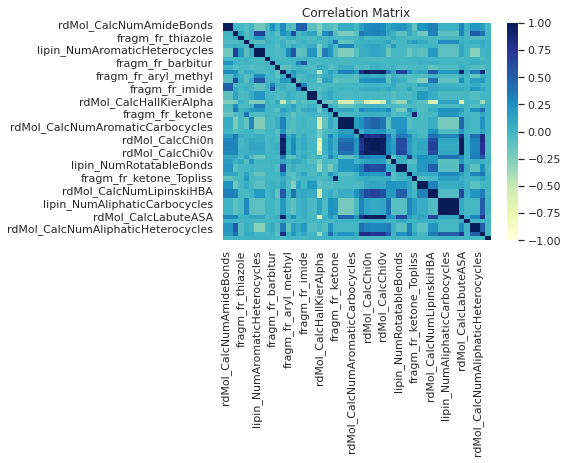

In [147]:
#Correlation
features = lr_features.to_list()
features.append('ACTIVE')
sns.heatmap(df[features].corr(),vmin=-1, vmax=1,cmap="YlGnBu");
plt.title('Correlation Matrix');

## Sampling

In [125]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

0.8.1


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [131]:
X_train.shape

(53483, 149)

In [132]:
oversample = SMOTE(sampling_strategy=0.3)
X_train, y_train = oversample.fit_resample(X_train, y_train)
undersample = RandomUnderSampler()
X_train, y_train = undersample.fit_resample(X_train, y_train)

In [133]:
y_train.value_counts()

0.0    15999
1.0    15999
Name: ACTIVE, dtype: int64

In [135]:
y_test.value_counts()

0.0    94812
1.0      270
Name: ACTIVE, dtype: int64

In [138]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.97, random_state=42)

## Model tuning

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import validation_curve

In [149]:
random_state=2
models_names=['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', "Neural Network Classifier", "Random Forest Classifier"]
clfs= [LogisticRegression(solver='liblinear', random_state=random_state), KNeighborsClassifier(),
           DecisionTreeClassifier(random_state=random_state),MLPClassifier(random_state=random_state), RandomForestClassifier(random_state=2)]
params={0: {'penalty':['l1', 'l2'], 'C': np.arange(0.01, 1, 0.01)}, 
       1: {'n_neighbors':np.arange(1, 10, 1), 'metric':['euclidean','manhattan'], 'weights': ['uniform', 'distance']},
       2: {'criterion':['gini', 'entropy'], 'max_depth':np.arange(2,4,1), 'min_samples_leaf': np.arange(10,20,1)}, 
       3: {'hidden_layer_sizes': [(22,), (22, 22)], 'solver':['sgd', 'adam'], 'activation':['logistic', 'tanh', 'relu']},
       4: {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,4,1), "min_samples_leaf": np.arange(3,10,1)}}


def Grid_Search_cv(model_index, X, y):
    
    grid = GridSearchCV(clfs[model_index], params[model_index], verbose = 0, cv = 5, n_jobs = -1, return_train_score = True)

    grid_results = grid.fit(X, y)
    
    return grid_results.best_estimator_.get_params()


def param_tuning(X_train, y_train):
    random_state=2

    best_params_lr = Grid_Search_cv(0, X_train, y_train)
    best_params_kn = Grid_Search_cv(1, X_train, y_train)
    best_params_dt = Grid_Search_cv(2, X_train, y_train)
    best_params_nn = Grid_Search_cv(3, X_train, y_train)
    best_params_rf = Grid_Search_cv(4, X_train, y_train)

    best_params_=[best_params_lr, best_params_kn, best_params_dt, best_params_nn, best_params_rf]

    for i in range(len(models_names)):
        print(" ")
        print('\033[1m' + 'Best parameter for ' + str(models_names[i]) +'\033[0m')
        print(best_params_[i])
    
    return best_params_

def model_building(X_train, y_train, X_test, y_test):

    train_accuracy=[]
    train_recall=[]
    train_precision=[]
    train_f1=[]
    train_auc=[]

    cv_accuracy=[]
    cv_precision=[]
    cv_recall=[]
    cv_f1=[]
    cv_auc=[]

    test_accuracy=[]
    test_precision=[]
    test_recall=[]
    test_f1=[]
    test_auc=[]

    best_params_= param_tuning(X_train, y_train)
    auc_mean_list=[]
    auc_std_list=[]
    for ix in range(len(models_names)):

        original_model=clone(clfs[ix])

        optimized_model=clone(clfs[ix]).set_params(**best_params_[ix])

        models=[optimized_model, original_model]

        for model in models:

            model = clone(model)

            model.fit(X_train, y_train)

            #--Train scores
            y_pred_train = model.predict(X_train)
            train_accuracy.append(accuracy_score(y_train, y_pred_train))
    #         train_recall.append(recall_score(y_train, y_pred_train))
    #         train_precision.append(precision_score(y_train, y_pred_train))
            train_f1.append(f1_score(y_train, y_pred_train))
            train_auc.append(roc_auc_score(y_train, y_pred_train))

            #--Validation scores
            cv_results = cross_validate(model, X_train, y_train, scoring=["accuracy", "recall", "precision", "f1", "roc_auc"])
            cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
    #         cv_recall.append(abs(np.mean(cv_results['test_recall'])))
    #         cv_precision.append(abs(np.mean(cv_results['test_precision'])))
            cv_f1.append(abs(np.mean(cv_results['test_f1'])))
            auc_mean=abs(np.mean(cv_results['test_roc_auc']))
            auc_mean_list.append(auc_mean)
            auc_std=abs(np.std(cv_results['test_roc_auc']))
            auc_std_list.append(auc_std)
            cv_auc.append(auc_mean)
        
            #--Test scores
            y_pred_test = model.predict(X_test)
            test_accuracy.append(accuracy_score(y_test, y_pred_test))
    #         test_recall.append(recall_score(y_test, y_pred_test))
    #         test_precision.append(precision_score(y_test, y_pred_test))
            test_f1.append(f1_score(y_test, y_pred_test))
            test_auc.append(roc_auc_score(y_train, y_pred_train))
        
    index_names=['Logistic Regression Tuned', 'Logistic Regression', 'KNN Classifier Tuned', 'KNN Classifier', 
                'Decision Tree Classifier Tuned', 'Decision Tree Classifier', 'Neural Network Classifier Tuned', 'Neural Network Classifier',
                'Random Forest Classifier Tuned', 'Random Forest Classifier'
                ]
    ttest_data = pd.DataFrame(
            {'mean':auc_mean_list,
             'std': auc_std_list                    
            })
    ttest_data.index=index_names

    ht_results = pd.DataFrame(list(zip(train_accuracy, train_f1, train_auc, cv_accuracy, cv_f1, 
                                       cv_auc, test_accuracy, test_f1, test_auc)), columns=["Train Accuracy", "Train F1", "Train AUC |", 
                                                                                                           "| Val. acc.",
                                                                                                           "Validat. F1", "Valid. AUC |", "| Test Acc",
                                                                                                           "Test F1", "Test AUC"])
    ht_results.index=index_names
    # ht_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, train_auc, cv_accuracy, cv_recall,
    #                                   cv_precision, cv_f1, cv_auc, test_accuracy, test_recall, test_precision, test_f1, test_auc)), columns=["Train Accuracy",
    #                                                                                                        "Train Recall", "Train Precision", "Train F1", "Train AUC", 
    #                                                                                                        "Validation Accuracy", "Validation Recall", "Validation Precision",
    #                                                                                                        "Validation F1", "Validation AUC", "Test Accuracy", "Test Recall", 
    #                                                                                                        "Test Precision", "Test F1", "Test AUC"])
    # ht_results.index=index_names
    return ht_results, ttest_data

In [103]:
ht_results,ttest_data=model_building(X_train, y_train, X_test, y_test)
ht_results

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

KeyboardInterrupt: 

In [140]:
ht_results_lr,ttest_data_lr=model_building(X_train[lr_features], y_train, X_test[lr_features], y_test)
ht_results_lr

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

 
Best parameter for Logistic Regression
{'C': 0.92, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter for KNN Classifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
 
Best parameter for Decision Tree Classifier
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2, 'splitter': 'best'}
 
Best parameter for Neural Network Classifier
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

 
Best parameter for Logistic Regression
{'C': 0.92, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter for KNN Classifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
 
Best parameter for Decision Tree Classifier
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2, 'splitter': 'best'}
 
Best parameter for Neural Network Classifier
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

 
Best parameter for Logistic Regression
{'C': 0.92, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter for KNN Classifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
 
Best parameter for Decision Tree Classifier
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2, 'splitter': 'best'}
 
Best parameter for Neural Network Classifier
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

 
Best parameter for Logistic Regression
{'C': 0.92, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter for KNN Classifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
 
Best parameter for Decision Tree Classifier
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2, 'splitter': 'best'}
 
Best parameter for Neural Network Classifier
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

 
Best parameter for Logistic Regression
{'C': 0.92, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter for KNN Classifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
 
Best parameter for Decision Tree Classifier
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2, 'splitter': 'best'}
 
Best parameter for Neural Network Classifier
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early

,Train Accuracy,Train F1,Train AUC |,| Val. acc.,Validat. F1,Valid. AUC |,| Test Acc,Test F1,Test AUC
Logistic Regression Tuned,0.954119,0.954167,0.954119,0.940549,0.940299,0.986567,0.937466,0.938320,0.954119
Logistic Regression,0.955162,0.955162,0.955163,0.940549,0.940299,0.986676,0.938046,0.938873,0.955163
KNN Classifier Tuned,0.991658,0.991597,0.991667,0.876942,0.885909,0.884920,0.874158,0.885131,0.991667
KNN Classifier,0.867570,0.881419,0.867450,0.797709,0.825120,0.902472,0.795548,0.825218,0.867450
Decision Tree Classifier Tuned,0.785193,0.753589,0.785328,0.774760,0.743171,0.840608,0.745868,0.714327,0.785328
Decision Tree Classifier,1.000000,1.000000,1.000000,0.861322,0.868697,0.861294,0.862141,0.864815,1.000000
Neural Network Classifier Tuned,0.962461,0.962025,0.962474,0.947857,0.947898,0.986051,0.938722,0.938732,0.962474
Neural Network Classifier,0.941606,0.941176,0.941614,0.937429,0.937491,0.985112,0.926222,0.926162,0.941614
Random Forest Classifier Tuned,0.819604,0.814577,0.819633,0.792490,0.785510,0.883312,0.787622,0.787533,0.819633
Random Forest Classifier,1.000000,1.000000,1.000000,0.922818,0.923599,0.974307,0.930797,0.932081,1.000000


In [151]:
ht_results_mi,ttest_data_mi=model_building(X_train[mi_features], y_train, X_test[mi_features], y_test)
ht_results_mi

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

 
Best parameter for Logistic Regression
{'C': 0.86, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter for KNN Classifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
 
Best parameter for Decision Tree Classifier
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 13, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2, 'splitter': 'best'}
 
Best parameter for Neural Network Classifier
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'ea

,Train Accuracy,Train F1,Train AUC |,| Val. acc.,Validat. F1,Valid. AUC |,| Test Acc,Test F1,Test AUC
Logistic Regression Tuned,0.946820,0.947040,0.946816,0.931185,0.931794,0.982696,0.923032,0.923476,0.946816
Logistic Regression,0.942649,0.943240,0.942639,0.927002,0.927413,0.979784,0.915332,0.916274,0.942639
KNN Classifier Tuned,0.989572,0.989474,0.989583,0.863416,0.871221,0.881919,0.852959,0.863148,0.989583
KNN Classifier,0.864442,0.879852,0.864309,0.799793,0.827818,0.912371,0.791391,0.823958,0.864309
Decision Tree Classifier Tuned,0.813347,0.827719,0.813261,0.791443,0.809159,0.858340,0.768904,0.790759,0.813261
Decision Tree Classifier,1.000000,1.000000,1.000000,0.840461,0.841502,0.840450,0.856890,0.859091,1.000000
Neural Network Classifier Tuned,0.959333,0.958555,0.959353,0.930132,0.930180,0.982868,0.923902,0.921752,0.959353
Neural Network Classifier,0.952033,0.952675,0.952020,0.923887,0.924501,0.979018,0.911498,0.913017,0.952020
Random Forest Classifier Tuned,0.808133,0.803419,0.808159,0.790390,0.784354,0.881936,0.771964,0.769821,0.808159
Random Forest Classifier,1.000000,1.000000,1.000000,0.905110,0.904799,0.960387,0.908470,0.910018,1.000000


## Model uncertainty

In [164]:
ttest_data_mi

,mean,std
Logistic Regression Tuned,0.982696,0.002409
Logistic Regression,0.979784,0.003963
KNN Classifier Tuned,0.881919,0.017352
KNN Classifier,0.912371,0.021094
Decision Tree Classifier Tuned,0.858340,0.008634
Decision Tree Classifier,0.840450,0.027265
Neural Network Classifier Tuned,0.982868,0.004757
Neural Network Classifier,0.979018,0.003568
Random Forest Classifier Tuned,0.881936,0.020765
Random Forest Classifier,0.960387,0.011456


In [ ]:
ttest_data_lr

In [ ]:
ttest_data

In [152]:
from scipy.stats import ttest_ind_from_stats

/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/skle

In [160]:
def ttest(dataframe):
    p_value = []
    tstatistic = []
    for i in range(5):
        a,b = ttest_ind_from_stats(mean1=dataframe['mean'][2*i], std1=dataframe['std'][2*i], nobs1=5,
                             mean2=dataframe['mean'][2*i+1], std2=dataframe['std'][2*i+1], nobs2=5)
        tstatistic.append(a)
        p_value.append(b)
    
    return p_value, tstatistic

In [161]:
ttest(ttest_data_mi)

([0.1980729432480312,
  0.03735152795980785,
  0.19943292259372847,
  0.1856616826742167,
  7.641804179347013e-05],
 [1.4034962603414982,
  -2.492925838156318,
  1.3987754657169638,
  1.447943443590552,
  -7.396949349197684])